In [2]:
import sys
sys.path.insert(0, "/Users/sophusmechlenburg/PycharmProjects/python_for_the_financial_economist")

"""
Load relevant packages
"""
    
# numpy for vector and matrix calculations + simulation
import numpy as np

# pandas 
import pandas as pd

# scipy
from scipy import stats

# plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# pandas datareader for getting data from different APIs 
import pandas_datareader as pdr

# packages for working with dates and time
import datetime

# copula package
import copulas

"""
Load own functions/packages
"""

# set plotting style
from codelib.visualization.layout import DefaultStyle
DefaultStyle();

# My functions
import MyFunctions

In [3]:
# Reload MyFunctions library. Run this when updating the file while working
import importlib
importlib.reload(MyFunctions)

<module 'MyFunctions' from '/Users/sophusmechlenburg/PycharmProjects/py_fin/Master Thesis/MyFunctions.py'>

In [4]:
from pandas_datareader.famafrench import FamaFrenchReader, get_available_datasets

"""
Get the 30 industry portfolios
"""

reader = FamaFrenchReader("30_Industry_Portfolios_daily",
                          start=datetime.datetime(1950, 1, 1))

industry_port_daily = reader.read()

# print description
industry_port_daily['DESCR']

/var/folders/vf/zf6_b41x70xg9rvm080gvn5w0000gn/T/ipykernel_3437/2994382365.py:10: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  industry_port_daily = reader.read()
/var/folders/vf/zf6_b41x70xg9rvm080gvn5w0000gn/T/ipykernel_3437/2994382365.py:10: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  industry_port_daily = reader.read()


'30 Industry Portfolios daily\n----------------------------\n\nThis file was created by CMPT_IND_RETS_DAILY using the 202412 CRSP database. It contains value- and equal-weighted returns for 30 industry portfolios. The portfolios are constructed at the end of June. Missing data are indicated by -99.99 or -999. Copyright 2024 Eugene F. Fama and Kenneth R. French\n\n  0 : Average Value Weighted Returns -- Daily (18958 rows x 30 cols)\n  1 : Average Equal Weighted Returns -- Daily (18958 rows x 30 cols)'

In [5]:
industry_port_daily = industry_port_daily[0] / 100

# Last 10 years
log_returns = np.log1p(industry_port_daily)
log_returns = log_returns.resample('W-FRI').sum()  # Resample to weekly (ending on Friday)
obs = len(log_returns)
log_returns = log_returns.iloc[obs-522:-1,:]
log_returns_np = log_returns.values
log_returns

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-09,0.012315,0.031474,0.024163,-0.022583,-0.016592,-0.005956,0.001592,0.022475,-0.010087,0.014101,...,-0.010899,-0.014249,0.006694,-0.009764,-0.028613,-0.000393,0.006627,0.005098,-0.031619,-0.012580
2015-01-16,-0.003690,0.006545,0.023244,-0.007905,0.002695,0.006175,-0.027787,0.003261,-0.002972,0.008463,...,0.005108,-0.010979,-0.035817,-0.001286,-0.007677,-0.016623,-0.017903,-0.008087,-0.030267,-0.006864
2015-01-23,0.012438,0.015069,0.011846,0.036140,0.022970,-0.001837,0.017203,0.003424,0.001632,0.023203,...,-0.006692,0.026783,0.032594,0.001761,0.036442,0.017977,0.024206,0.021710,0.015616,0.014797
2015-01-30,-0.036161,-0.041847,-0.023478,0.008020,-0.012490,-0.040535,-0.019847,-0.017820,-0.009714,-0.018556,...,-0.031343,-0.047075,-0.023925,-0.012843,-0.040856,-0.023933,-0.011284,-0.004860,-0.032936,-0.030585
2015-02-06,0.016886,0.026664,0.009492,0.018850,0.048547,0.025376,-0.003419,0.002446,0.049266,0.024443,...,0.064840,0.030609,0.028793,0.031588,0.019172,0.030117,0.037495,0.009820,0.055875,0.033119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-29,0.013352,0.008294,0.021285,0.001326,0.000015,0.014151,0.023169,0.022917,0.005203,0.000776,...,0.016859,0.009590,0.002061,0.006833,0.013731,0.009916,0.035391,0.011204,0.010552,0.013072
2024-12-06,-0.026871,-0.014518,-0.015041,0.034428,0.003147,-0.020522,0.047100,-0.006626,-0.027809,-0.046440,...,-0.003249,0.039904,0.025514,-0.027116,-0.037889,-0.012056,0.047317,0.011001,-0.021761,-0.023325
2024-12-13,0.009122,0.005109,-0.034497,-0.017552,-0.020964,-0.011005,-0.007087,-0.026585,-0.030016,-0.012465,...,-0.032177,-0.002297,0.004395,-0.011943,-0.019993,-0.028490,-0.005724,-0.023515,-0.023695,-0.028550


[0.57375164 0.70444925 0.76032224 0.79360707 0.82250785 0.85028708
 0.87002921 0.88497628 0.89866045 0.91096086 0.92135334 0.93032264
 0.93875171 0.94573671 0.95193612 0.95761233 0.95892422 0.96394818
 0.96885366 0.97057056 0.97247438 0.97445949 0.97668879 0.98082904
 0.98339035 0.98610474 0.98920214 0.99251329 0.99623332 1.        ]


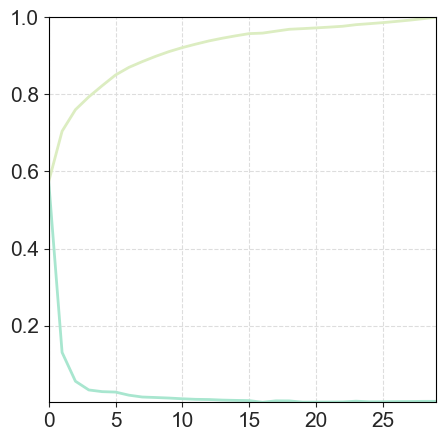

In [6]:
cov = log_returns.cov()
eig_output = np.linalg.eig(cov)
eig_values = eig_output[0]
eig_vectors = eig_output[1]

P = log_returns @ eig_vectors

PC4 = P.values[:, :4]
PC4_pd = P.iloc[:, :4]

total_variance = np.sum(eig_values)
proportion_explained = eig_values / total_variance
cum_explained = np.cumsum(proportion_explained)

fig, ax = plt.subplots(figsize=(5,5))
ax.plot(proportion_explained)
ax.plot(cum_explained)

print(cum_explained)

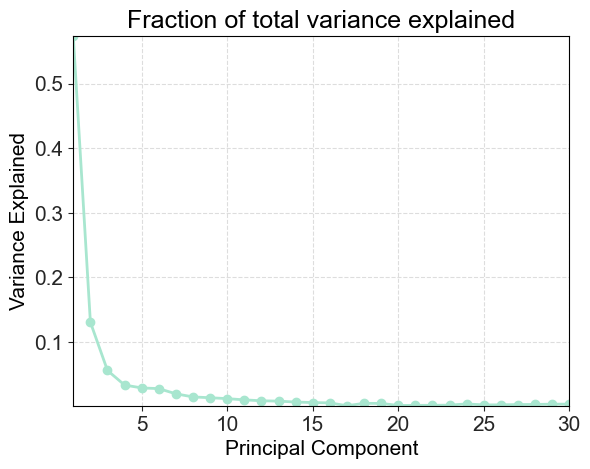

[0.57375164 0.70444925 0.76032224 0.79360707 0.82250785 0.85028708
 0.87002921 0.88497628 0.89866045 0.91096086 0.92135334 0.93032264
 0.93875171 0.94573671 0.95193612 0.95761233 0.95892422 0.96394818
 0.96885366 0.97057056 0.97247438 0.97445949 0.97668879 0.98082904
 0.98339035 0.98610474 0.98920214 0.99251329 0.99623332 1.        ]


In [7]:
# Scree plot / Elbow method would suggest using 4 PCs

plt.plot(range(1, len(proportion_explained) + 1), proportion_explained, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.title('Fraction of total variance explained')
plt.show()
print(cum_explained)

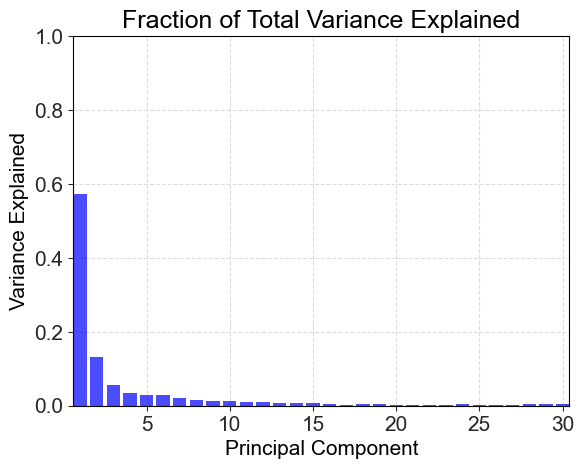

[0.57375164 0.70444925 0.76032224 0.79360707 0.82250785 0.85028708
 0.87002921 0.88497628 0.89866045 0.91096086 0.92135334 0.93032264
 0.93875171 0.94573671 0.95193612 0.95761233 0.95892422 0.96394818
 0.96885366 0.97057056 0.97247438 0.97445949 0.97668879 0.98082904
 0.98339035 0.98610474 0.98920214 0.99251329 0.99623332 1.        ]


In [8]:

plt.bar(range(1, len(proportion_explained) + 1), proportion_explained, color='blue', alpha=0.7)
plt.ylim(0, 1)
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.title('Fraction of Total Variance Explained')

# Show the plot
plt.show()

# Print cumulative explained variance
print(cum_explained)

In [9]:
"""
Modelling PC4 with a copula and marginals
"""

# 1. Separate joint factor distribution into marginals and copula
obs = len(PC4)
probabilities = np.repeat(1/obs, obs)
x, u, U = MyFunctions.CMA_separation(PC4, probabilities)

# 2. Fit t-distributions to factors
t_params = MyFunctions.fit_t_distributions(PC4)

# 3. Simulate returns using Gaussian copula with t-marginals
simulated_returns = MyFunctions.simulate_returns_gaussian_copula_t_marginals(U, t_params, n_samples=10_000)

# 4. Analyze the simulated returns
simulated_stats = MyFunctions.compute_returns_statistics(simulated_returns)
simulated_stats

,Mean (%),Median (%),Std Dev (%),Min (%),Max (%),Ann. Return (%),Ann. Volatility (%),Sharpe Ratio,Skewness,Kurtosis,VaR 95% (%),VaR 99% (%),JB p-value,Max Drawdown (%)
Sector_1,-1.232763,-1.270994,15.138196,-203.629743,259.002875,-64.103696,109.163080,-0.587229,0.524446,20.616573,-23.343714,-41.112072,0.000000e+00,-100.00000
Sector_2,-0.463954,-0.462253,7.097941,-54.927934,52.098105,-24.125590,51.183984,-0.471350,-0.040899,3.836614,-11.605283,-18.882243,0.000000e+00,-100.00000
Sector_3,0.222644,0.223520,5.422796,-150.932839,95.574851,11.577490,39.104337,0.296067,-2.258665,111.636883,-6.620832,-13.309852,0.000000e+00,-97.99032
Sector_4,-0.223660,-0.202164,3.524015,-24.828880,18.397673,-11.630310,25.412037,-0.457669,-0.079376,1.212256,-5.971436,-9.230575,1.050952e-135,-100.00000


### Original Factor characteristics

In [10]:
original_stats = MyFunctions.compute_returns_statistics(PC4)
original_stats

,Mean (%),Median (%),Std Dev (%),Min (%),Max (%),Ann. Return (%),Ann. Volatility (%),Sharpe Ratio,Skewness,Kurtosis,VaR 95% (%),VaR 99% (%),JB p-value,Max Drawdown (%)
Sector_1,-0.883897,-1.605723,14.769468,-79.272164,102.210658,-45.962648,106.504150,-0.431557,0.850595,8.323566,-21.841371,-30.872966,0.000000e+00,-99.792030
Sector_2,-0.328912,-0.560343,7.049149,-32.994568,31.641752,-17.103408,50.832140,-0.336468,-0.097101,2.961439,-10.860264,-16.420061,3.859542e-41,-95.308007
Sector_3,0.318155,0.237139,4.608970,-16.685183,27.240975,16.544070,33.235754,0.497779,0.585565,4.381417,-6.730756,-11.714112,1.877065e-95,-61.123525
Sector_4,-0.220476,-0.245551,3.557346,-12.910330,12.296224,-11.464755,25.652383,-0.446927,0.012193,0.758724,-5.966319,-8.992903,2.606757e-03,-72.883104


In [11]:
# Fitted marginals of Principal Components


In [12]:
PC4.sum(axis=0)

array([-4.60510375, -1.71362996,  1.65758854, -1.14868024])

In [13]:
log_returns.sum(axis=0)

Food     0.578366
Beer     0.684922
Smoke    0.903850
Games    1.291185
Books    0.403142
Hshld    0.671967
Clths    0.593832
Hlth     0.816385
Chems    0.512127
Txtls   -0.185375
Cnstr    1.499254
Steel    0.824927
FabPr    1.349580
ElcEq    0.651121
Autos    1.845174
Carry    0.982095
Mines    1.058355
Coal    -0.213928
Oil      0.465120
Util     0.753148
Telcm    0.455691
Servs    1.651847
BusEq    2.069367
Paper    0.365676
Trans    0.716092
Whlsl    1.028393
Rtail    1.418007
Meals    1.202261
Fin      1.169349
Other    0.978916
dtype: float64

In [14]:
# PCA function

def calculate_PCA(returns, n_components):
    """
    Extract n principal components from returns data.

    Parameters:
    returns (numpy ndarray)
    n_components (integer): The number of Principal Components to extract

    Returns:
    eig_values, eig_vectors, PC
    """
    # 1. Calculate covariance matrix
    cov = returns.cov()

    # 2. Compute eigenvalues and eigenvectors
    eig_values, eig_vectors = np.linalg.eigh(cov)  # eigh for symmetric matrices

    # 3. Sort eigenvalues and eigenvectors in descending order
    idx = eig_values.argsort()[::-1]
    eig_values = eig_values[idx]
    eig_vectors = eig_vectors[:, idx]
    
    # 4. Center the data
    returns_centered = returns - returns.mean()
    
    # 5. Project data onto eigenvectors
    P = returns_centered @ eig_vectors
    
    # 6. Select first n principal components
    PC = P.iloc[:, :n_components]

    return eig_values, eig_vectors, PC

In [15]:
total_variance = np.sum(eig_values)
proportion_explained = eig_values / total_variance
cum_explained = np.cumsum(proportion_explained)
cum_explained

array([0.57375164, 0.70444925, 0.76032224, 0.79360707, 0.82250785,
       0.85028708, 0.87002921, 0.88497628, 0.89866045, 0.91096086,
       0.92135334, 0.93032264, 0.93875171, 0.94573671, 0.95193612,
       0.95761233, 0.95892422, 0.96394818, 0.96885366, 0.97057056,
       0.97247438, 0.97445949, 0.97668879, 0.98082904, 0.98339035,
       0.98610474, 0.98920214, 0.99251329, 0.99623332, 1.        ])

### Plot functions

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import matplotlib.gridspec as gridspec

def plot_histograms_with_fits(returns_data, t_params, sector_names=None, n_cols=3, figsize=(15, 20)):
    """
    Plot histograms of returns with fitted Student's t distributions
    
    Parameters:
    returns_data (numpy.ndarray or pandas.DataFrame): Matrix of returns
    t_params (list of tuples): List of (df, loc, scale) parameters for each stock's t-distribution
    sector_names (list, optional): List of sector names. If None, will use generic names
    n_cols (int): Number of columns in the plot grid
    figsize (tuple): Figure size (width, height)
    
    Returns:
    matplotlib.figure.Figure: The figure object containing the plots
    """
    if isinstance(returns_data, pd.DataFrame):
        if sector_names is None:
            sector_names = returns_data.columns.tolist()
        returns_data = returns_data.values
    else:
        if sector_names is None:
            sector_names = [f"Sector_{i+1}" for i in range(returns_data.shape[1])]
    
    n_sectors = returns_data.shape[1]
    n_rows = int(np.ceil(n_sectors / n_cols))
    
    fig = plt.figure(figsize=figsize)
    gs = gridspec.GridSpec(n_rows, n_cols)
    
    for i in range(n_sectors):
        ax = plt.subplot(gs[i // n_cols, i % n_cols])
        
        # Extract data for this sector
        data = returns_data[:, i]
        
        # Plot histogram with density=True for proper scaling
        n, bins, patches = ax.hist(data, bins=30, density=True, alpha=0.7, 
                                 color='skyblue', edgecolor='black')
        
        # Get t-distribution parameters for this sector
        df, loc, scale = t_params[i]
        
        # Create x values for the PDF
        x = np.linspace(min(data), max(data), 1000)
        
        # Plot the PDF
        pdf = stats.t.pdf(x, df=df, loc=loc, scale=scale)
        ax.plot(x, pdf, 'r-', linewidth=2, label=f't-dist (df={df:.2f})')
        
        # Normal distribution for comparison
        norm_mean = np.mean(data)
        norm_std = np.std(data)
        norm_pdf = stats.norm.pdf(x, loc=norm_mean, scale=norm_std)
        ax.plot(x, norm_pdf, 'g--', linewidth=1.5, label='Normal')
        
        # Add vertical line at mean
        #ax.axvline(x=loc, color='k', linestyle='--', alpha=0.5) # removed this
        
        # Set title and labels
        ax.set_title(f"{sector_names[i]}")
        ax.set_xlabel("Return")
        ax.set_ylabel("Density")
        
        # Add legend
        ax.legend(loc='best', fontsize='small')
        
        # Add text with statistics
        stats_text = f"Mean: {loc:.4f}\nStd: {scale:.4f}\nDF: {df:.2f}"
        ax.text(0.05, 0.95, stats_text, transform=ax.transAxes, fontsize=8,
                verticalalignment='top', bbox=dict(boxstyle='round', alpha=0.5, facecolor='white'))
    
    plt.tight_layout()
    return fig

def create_qq_plots(returns_data, t_params, sector_names=None, n_cols=3, figsize=(15, 20)):
    """
    Create Q-Q plots comparing empirical data to fitted Student's t distributions
    
    Parameters:
    returns_data (numpy.ndarray or pandas.DataFrame): Matrix of returns
    t_params (list of tuples): List of (df, loc, scale) parameters for each stock's t-distribution
    sector_names (list, optional): List of sector names. If None, will use generic names
    n_cols (int): Number of columns in the plot grid
    figsize (tuple): Figure size (width, height)
    
    Returns:
    matplotlib.figure.Figure: The figure object containing the plots
    """
    if isinstance(returns_data, pd.DataFrame):
        if sector_names is None:
            sector_names = returns_data.columns.tolist()
        returns_data = returns_data.values
    else:
        if sector_names is None:
            sector_names = [f"Sector_{i+1}" for i in range(returns_data.shape[1])]
    
    n_sectors = returns_data.shape[1]
    n_rows = int(np.ceil(n_sectors / n_cols))
    
    fig = plt.figure(figsize=figsize)
    gs = gridspec.GridSpec(n_rows, n_cols)
    
    for i in range(n_sectors):
        ax = plt.subplot(gs[i // n_cols, i % n_cols])
        
        # Extract data for this sector
        data = returns_data[:, i]
        
        # Get t-distribution parameters for this sector
        df, loc, scale = t_params[i]
        
        # Calculate theoretical quantiles from t-distribution
        data_sorted = np.sort(data)
        n = len(data_sorted)
        p = np.arange(1, n + 1) / (n + 1)  # Plotting positions
        theoretical_quantiles = stats.t.ppf(p, df=df, loc=loc, scale=scale)
        
        # Create scatter plot
        ax.scatter(theoretical_quantiles, data_sorted, s=10, alpha=0.7)
        
        # Add diagonal line for reference
        min_val = min(np.min(theoretical_quantiles), np.min(data_sorted))
        max_val = max(np.max(theoretical_quantiles), np.max(data_sorted))
        ax.plot([min_val, max_val], [min_val, max_val], 'r--')
        
        # Set title and labels
        ax.set_title(f"Q-Q Plot: {sector_names[i]}")
        ax.set_xlabel("Theoretical Quantiles (t-dist)")
        ax.set_ylabel("Sample Quantiles")
        
        # Add text with distribution parameters
        stats_text = f"df: {df:.2f}\nloc: {loc:.4f}\nscale: {scale:.4f}"
        ax.text(0.05, 0.95, stats_text, transform=ax.transAxes, fontsize=8,
                verticalalignment='top', bbox=dict(boxstyle='round', alpha=0.5, facecolor='white'))
    
    plt.tight_layout()
    return fig

# Example usage:
# fit_figure = plot_histograms_with_fits(log_returns, t_params, sector_names)
# plt.savefig('sector_distributions.png', dpi=300)
# plt.close()
#
# qq_figure = create_qq_plots(log_returns, t_params, sector_names)
# plt.savefig('sector_qq_plots.png', dpi=300)
# plt.close()

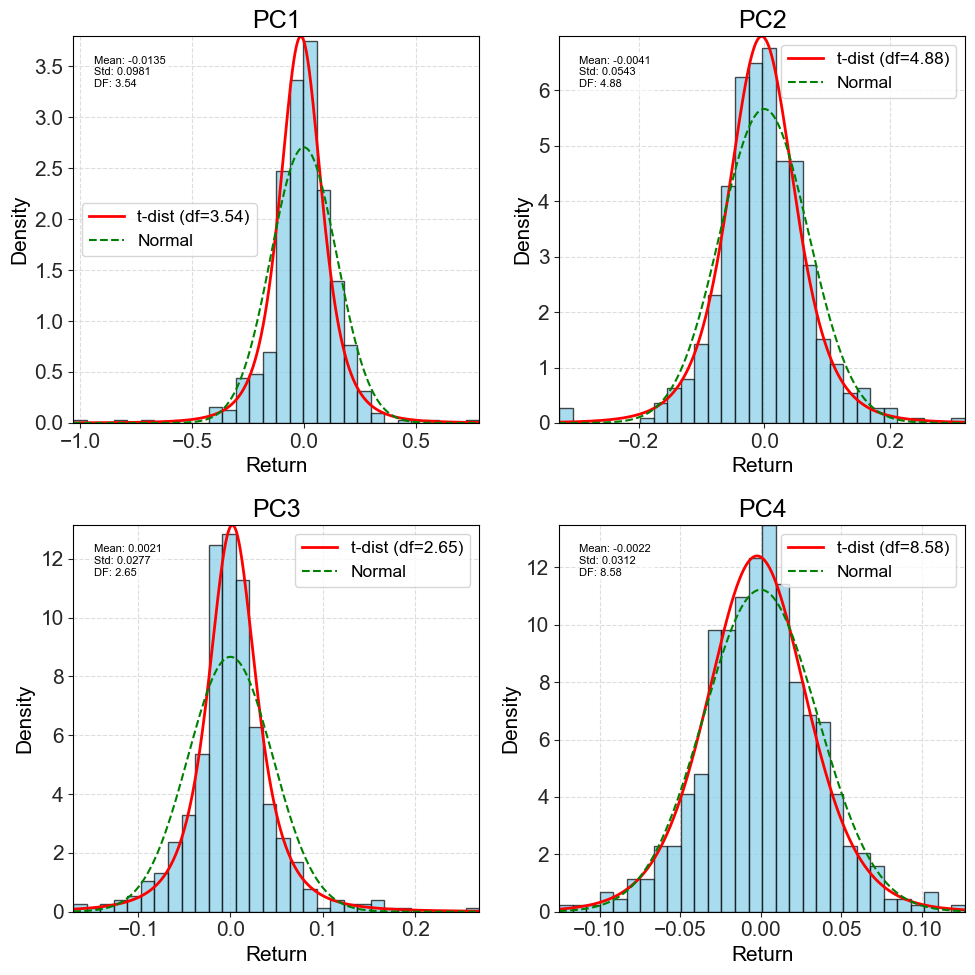

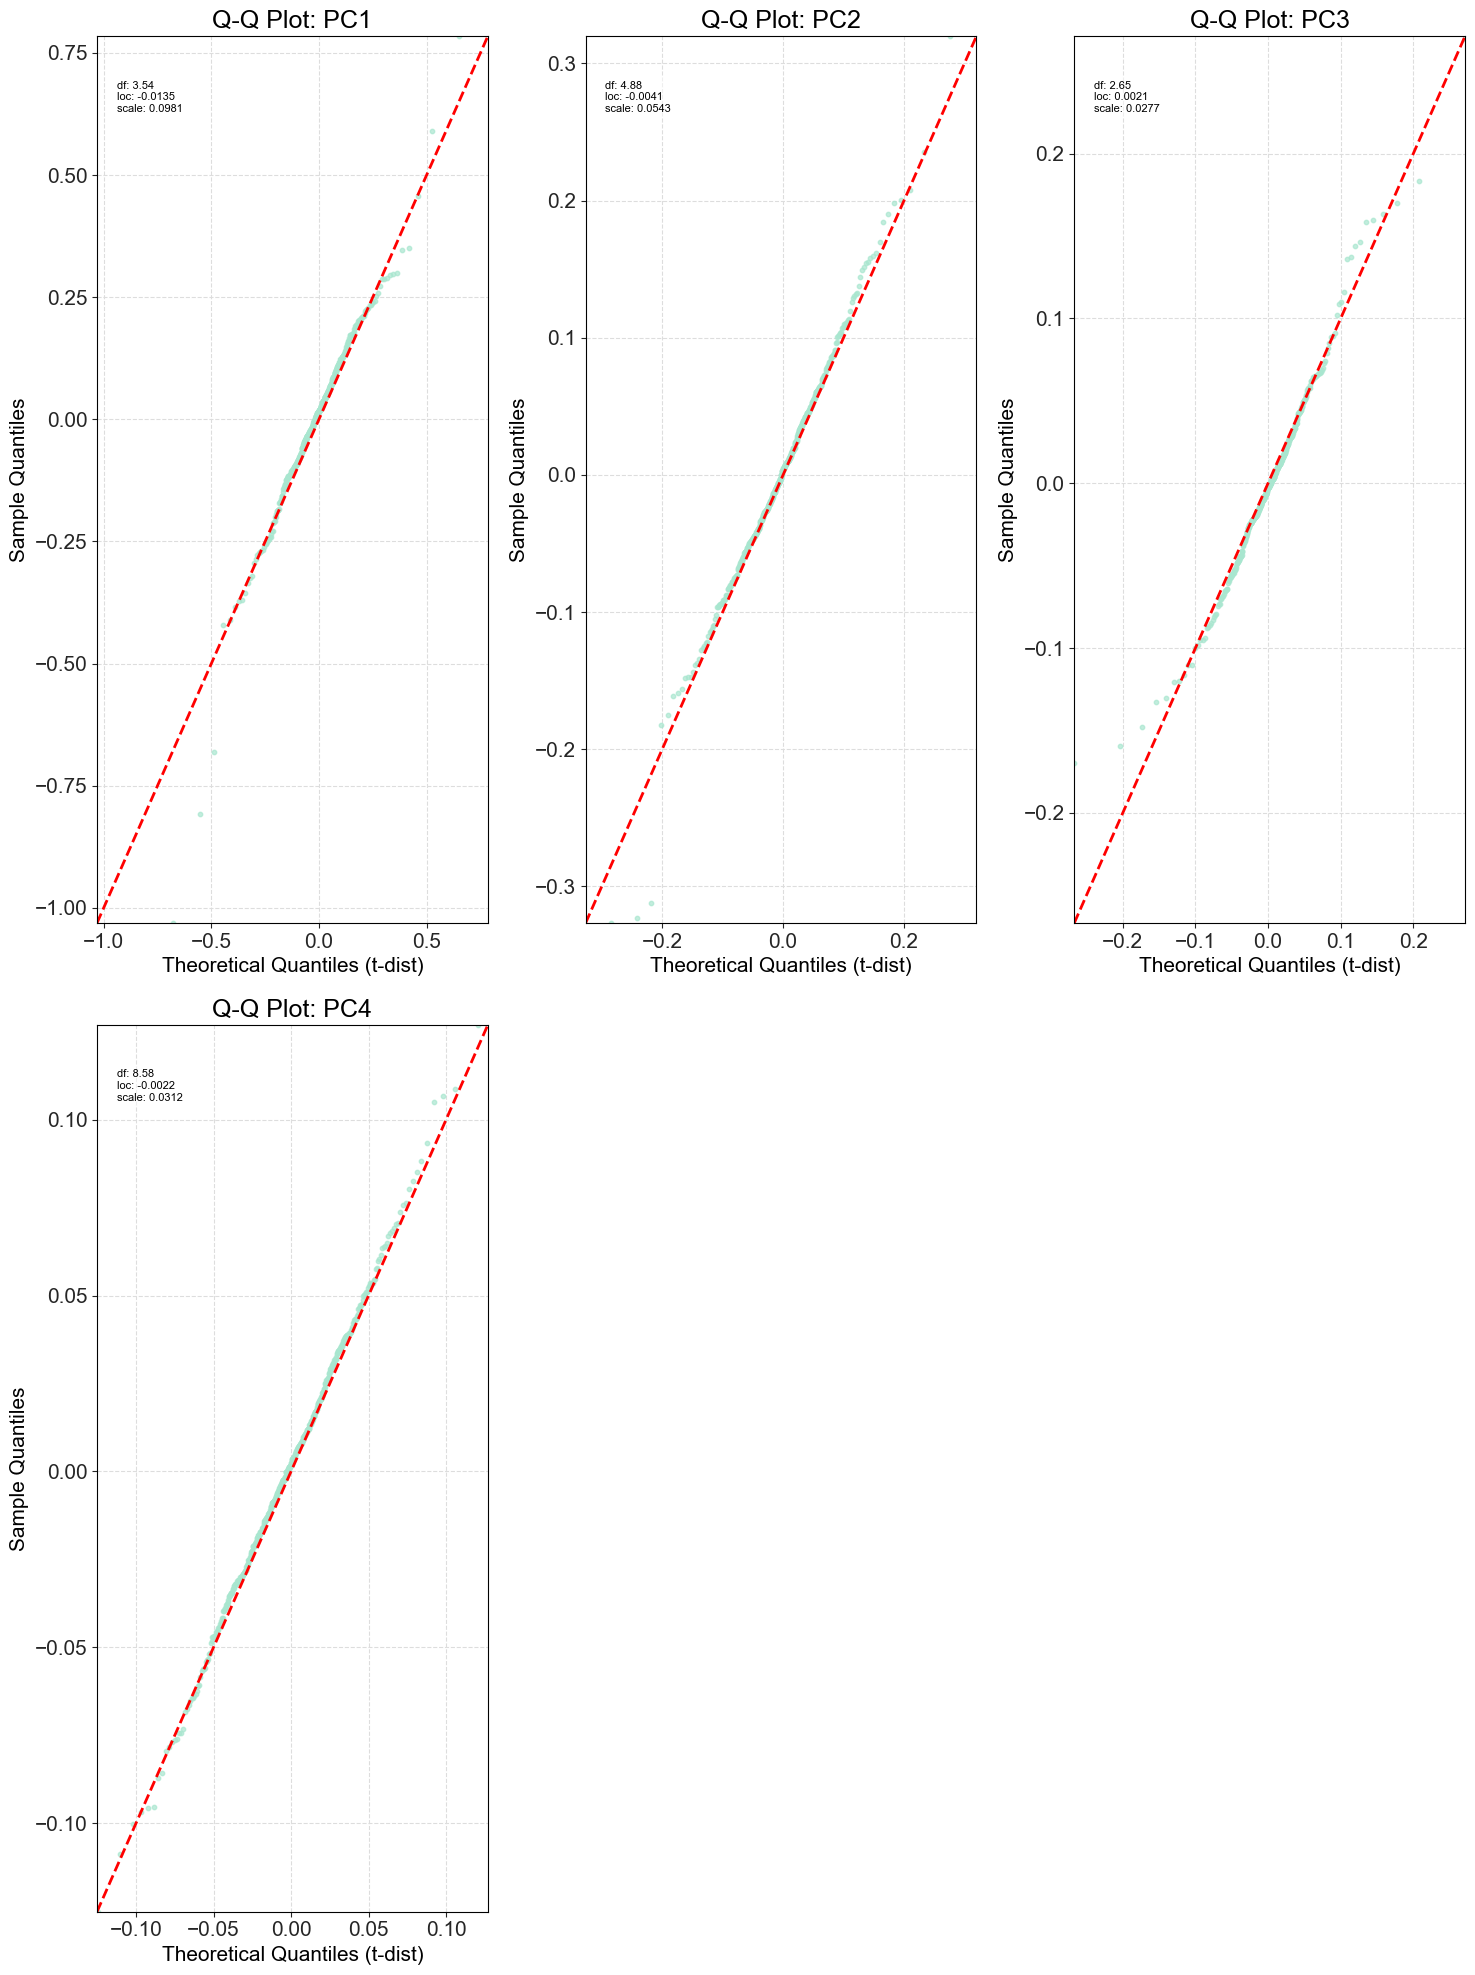

In [32]:
# Assuming you have:
# - log_returns: Your original returns data
# - t_params: Parameters from fitted t-distributions 
# - sector_names: List of your sector names

names = ["PC1", "PC2", "PC3", "PC4"]

# Create the histogram plots
fig1 = plot_histograms_with_fits(PC4, t_params, sector_names=names, n_cols=2, figsize=(10, 10))
#plt.savefig('sector_histograms.png', dpi=300)
#plt.close(fig1)

# Create the Q-Q plots
fig2 = create_qq_plots(PC4, t_params, sector_names=names)
#plt.savefig('sector_qq_plots.png', dpi=300)
#plt.close(fig2)

In [18]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
import statsmodels.api as sm
from copulas.multivariate import GaussianMultivariate, VineCopula
import warnings
warnings.filterwarnings('ignore')

def convert_to_uniform(data):
    """
    Convert data to uniform margins using empirical CDF (pseudo-observations)
    
    Parameters:
    data (numpy.ndarray): Data matrix, shape (n_samples, n_dimensions)
    
    Returns:
    numpy.ndarray: Data with uniform margins, shape (n_samples, n_dimensions)
    """
    n, d = data.shape
    u_data = np.zeros_like(data)
    
    for j in range(d):
        # Use empirical CDF to transform to uniform
        # This is more robust than parametric fitting for this step
        sorted_data = np.sort(data[:, j])
        ecdf = sm.distributions.ECDF(data[:, j])
        u_data[:, j] = ecdf(data[:, j])
        
        # Avoid exact 0s and 1s (for later inverse transforms)
        u_data[:, j] = (u_data[:, j] * (n - 1) + 0.5) / n
    
    return u_data

def fit_and_evaluate_copulas(data, test_size=0.2):
    """
    Fit different copula types and evaluate their performance
    
    Parameters:
    data (numpy.ndarray): Data matrix, shape (n_samples, n_dimensions)
    test_size (float): Proportion of data to use for testing
    
    Returns:
    dict: Dictionary with copula models and their performance metrics
    """
    # Convert data to uniform margins
    u_data = convert_to_uniform(data)
    
    # Split into training and testing sets
    n = len(data)
    n_train = int(n * (1 - test_size))
    train_data = data[:n_train]
    test_data = data[n_train:]
    train_u = u_data[:n_train]
    test_u = u_data[n_train:]
    
    # Initialize models
    copula_models = {
        'Gaussian': GaussianMultivariate(),
        'Vine': VineCopula("center")
    }
    
    results = {}
    
    for name, model in copula_models.items():
        print(f"Fitting {name} copula...")
        # Fit copula
        model.fit(train_data)
        
        # Calculate log-likelihood on test data
        test_ll = model.logpdf(test_data).sum()
        
        # Generate samples
        samples = model.sample(1000)
        
        results[name] = {
            'model': model,
            'test_log_likelihood': test_ll,
            'samples': samples
        }
    
    return results

def plot_copula_comparison(original_data, copula_results):
    """
    Plot comparisons between original data and different copula models
    
    Parameters:
    original_data (numpy.ndarray): Original data matrix
    copula_results (dict): Results from fit_and_evaluate_copulas
    
    Returns:
    matplotlib.figure.Figure: The figure object containing the plots
    """
    copula_names = list(copula_results.keys())
    n_copulas = len(copula_names)
    n_dims = original_data.shape[1]
    
    # Create scatter plot matrix
    n_cols = n_dims
    n_rows = n_dims
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(4*n_cols, 4*n_rows))
    
    # Get uniform margins for original data
    original_u = convert_to_uniform(original_data)
    
    # For each combination of dimensions
    for i in range(n_dims):
        for j in range(n_dims):
            ax = axes[i, j]
            
            if i == j:
                # Histogram on diagonal
                ax.hist(original_data[:, i], bins=20, alpha=0.7, color='blue', density=True)
                
                # Add kernel density estimate
                x = np.linspace(min(original_data[:, i]), max(original_data[:, i]), 1000)
                kde = KernelDensity(bandwidth=0.5).fit(original_data[:, i].reshape(-1, 1))
                log_dens = kde.score_samples(x.reshape(-1, 1))
                ax.plot(x, np.exp(log_dens), 'r-', lw=2)
                
                ax.set_title(f"Factor {i+1}")
            else:
                # Scatter plots on off-diagonal
                # Plot original data
                ax.scatter(original_data[:, j], original_data[:, i], 
                           alpha=0.5, s=5, color='blue', label='Original')
                
                # Add contour lines from a 2D KDE
                try:
                    # Create a meshgrid for contour plotting
                    xx, yy = np.meshgrid(
                        np.linspace(min(original_data[:, j]), max(original_data[:, j]), 100),
                        np.linspace(min(original_data[:, i]), max(original_data[:, i]), 100)
                    )
                    positions = np.vstack([xx.ravel(), yy.ravel()]).T
                    
                    # Fit 2D KDE
                    values = np.vstack([original_data[:, j], original_data[:, i]]).T
                    kernel = KernelDensity(bandwidth=0.5).fit(values)
                    
                    # Evaluate KDE on meshgrid
                    Z = np.exp(kernel.score_samples(positions))
                    Z = Z.reshape(xx.shape)
                    
                    # Plot contours
                    contour = ax.contour(xx, yy, Z, colors='black', alpha=0.5, linewidths=0.8)
                except:
                    pass
                    
                if i == n_dims-1:
                    ax.set_xlabel(f"Factor {j+1}")
                if j == 0:
                    ax.set_ylabel(f"Factor {i+1}")
    
    plt.tight_layout()
    
    # Create a new figure for comparison with copula samples
    fig2, axes2 = plt.subplots(n_copulas, n_dims-1, figsize=(16, 4*n_copulas))
    
    # If only one copula type, wrap axes in a list
    if n_copulas == 1:
        axes2 = [axes2]
    
    # For each copula model
    for k, copula_name in enumerate(copula_names):
        samples = copula_results[copula_name]['samples']
        
        # Plot scatter for different factor combinations
        for j in range(n_dims-1):
            ax = axes2[k, j]
            ax.scatter(original_data[:, j], original_data[:, j+1], 
                       alpha=0.3, s=5, color='blue', label='Original')
            ax.scatter(samples[:, j], samples[:, j+1], 
                       alpha=0.3, s=5, color='red', label='Simulated')
            
            ax.set_title(f"{copula_name}: Factor {j+1} vs Factor {j+2}")
            ax.set_xlabel(f"Factor {j+1}")
            ax.set_ylabel(f"Factor {j+2}")
            ax.legend()
    
    plt.tight_layout()
    
    # Create a table to show quantitative results
    fig3, ax3 = plt.subplots(figsize=(8, 4))
    test_ll_values = [copula_results[name]['test_log_likelihood'] for name in copula_names]
    
    # Hide axes
    ax3.axis('tight')
    ax3.axis('off')
    
    # Create table
    table_data = [['Copula Type', 'Test Log-Likelihood']]
    for name, ll in zip(copula_names, test_ll_values):
        table_data.append([name, f"{ll:.2f}"])
    
    table = ax3.table(cellText=table_data, loc='center', cellLoc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.scale(1, 1.5)
    
    plt.title('Copula Model Comparison', fontsize=16)
    
    return fig, fig2, fig3

def test_alternative_fitting(data):
    """
    Alternative approach for fitting and comparing copulas using custom implementation
    
    Parameters:
    data (numpy.ndarray): Data matrix, shape (n_samples, n_dimensions)
    
    Returns:
    tuple: (best_copula_type, aic_values)
    """
    # Convert data to uniform margins
    u_data = convert_to_uniform(data)
    
    # Convert to pseudo-observations in normal space
    z_data = stats.norm.ppf(u_data)
    
    # Estimate correlation matrix
    corr_matrix = np.corrcoef(z_data, rowvar=False)
    
    # Calculate log-likelihood for Gaussian copula
    det_corr = np.linalg.det(corr_matrix)
    inv_corr = np.linalg.inv(corr_matrix)
    n, d = z_data.shape
    
    # Gaussian copula log-likelihood
    gauss_ll = 0
    for i in range(n):
        z_i = z_data[i]
        gauss_ll -= 0.5 * z_i.dot(inv_corr).dot(z_i)
    gauss_ll -= 0.5 * n * np.log(det_corr)
    
    # Fit t-copula (estimate degrees of freedom)
    best_t_ll = -np.inf
    best_df = 0
    
    for df in [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 30]:
        t_ll = 0
        for i in range(n):
            z_i = z_data[i]
            t_ll += np.log(stats.multivariate_t.pdf(z_i, loc=np.zeros(d), 
                                                  shape=corr_matrix, df=df))
            
            # Add contribution from margins
            for j in range(d):
                t_ll -= np.log(stats.t.pdf(z_data[i, j], df=df))
        
        if t_ll > best_t_ll:
            best_t_ll = t_ll
            best_df = df
    
    # Calculate AIC for both models
    gauss_aic = -2 * gauss_ll + 2 * (d * (d-1) / 2)  # Parameters are in correlation matrix
    t_aic = -2 * best_t_ll + 2 * (d * (d-1) / 2 + 1)  # Additional parameter for df
    
    aic_values = {'Gaussian': gauss_aic, 'Student-t': t_aic, 'Best t-copula df': best_df}
    
    best_copula_type = 'Gaussian' if gauss_aic < t_aic else 'Student-t'
    
    return best_copula_type, aic_values


In [19]:
# Example usage:
# 1. Run the copula comparison
#copula_results = fit_and_evaluate_copulas(PC4)
# 
# 2. Plot the comparisons
# fig1, fig2, fig3 = plot_copula_comparison(pca_factors, copula_results)
# plt.show()
# 
# 3. Alternative method
# best_copula, aic_values = test_alternative_fitting(pca_factors)
# print(f"Best copula type: {best_copula}")
# print(f"AIC values: {aic_values}")

## Empirical CMA for PC4

In [20]:
mean_vector, eig_values, eig_vectors, PC4 = MyFunctions.calculate_PCA(log_returns, 4)
PC4.shape

(521, 4)

In [21]:
# Model PC4 with multivariate empirical

obs = len(PC4)
equal_probabilities = np.repeat(1/obs, obs)
sorted_PC4, cdf_PC4, grades_PC4 = MyFunctions.CMA_separation(PC4.values, equal_probabilities)


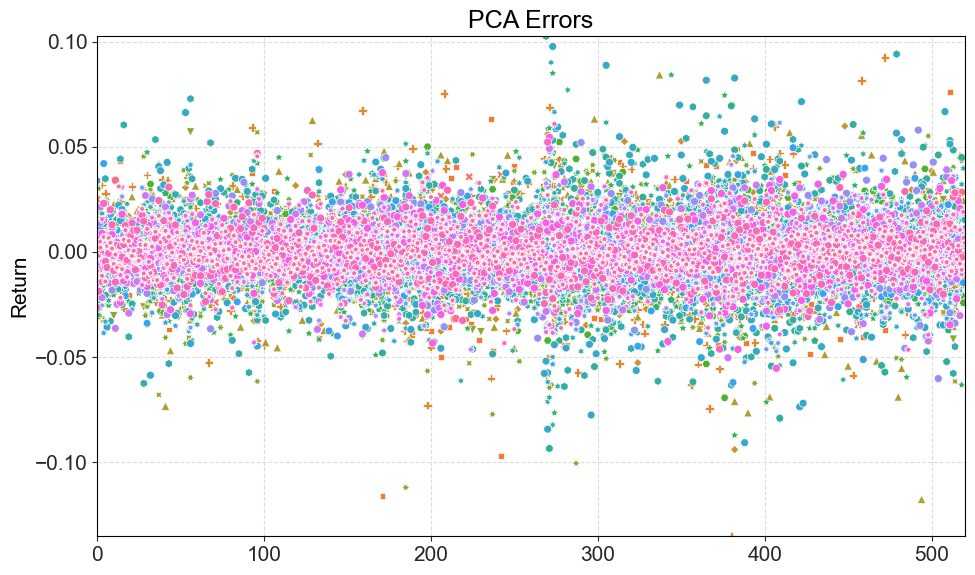

In [35]:
# Assuming you already have:
# - mean_vector = log_returns.mean()
# - log_returns_centered = log_returns - mean_vector
# - eig_vectors (sorted by descending eigenvalues)
# - PC4 = log_returns_centered @ eig_vectors[:, :4]

# Reconstruct log returns using only the first 4 PCs
reconstructed_centered = PC4 @ eig_vectors[:, :4].T # using eig_vectors as loading/coefficients
reconstructed_returns = reconstructed_centered + mean_vector.values

# Calculate errors (what the 4 PCs cannot explain)
errors = log_returns.values - reconstructed_returns.values

# Plot errors
plt.figure(figsize=(10, 6))
sns.scatterplot(data=errors, legend=False)
plt.title('PCA Errors')
plt.ylabel("Return")
plt.tight_layout()
plt.show()

## Error Modelling

2025-03-24 09:26:12.443 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted norm distribution with error=386.66996)
2025-03-24 09:26:12.470 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted laplace distribution with error=113.242746)
2025-03-24 09:26:12.500 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted logistic distribution with error=216.821597)
2025-03-24 09:26:12.522 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted cauchy distribution with error=328.671657)
2025-03-24 09:26:12.623 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted skewnorm distribution with error=375.954396)
2025-03-24 09:26:12.965 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted t distribution with error=16.126248)


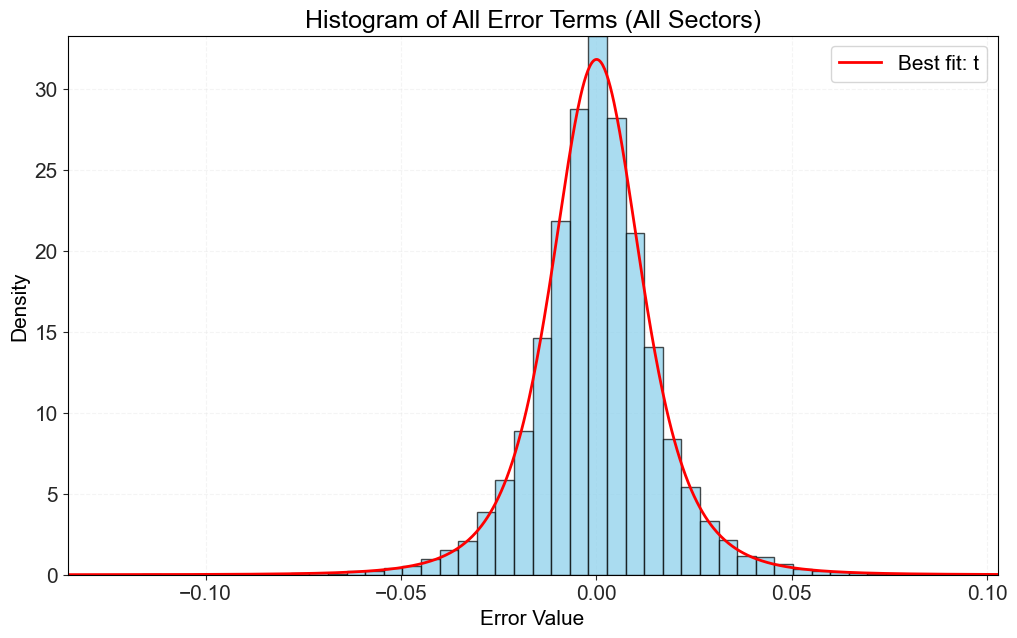

Best distribution for all pooled errors: t
Parameters: (4.075061638375932, 5.15037134644142e-05, 0.01180006631550391)


2025-03-24 09:26:13.233 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted norm distribution with error=4612.712762)
2025-03-24 09:26:13.255 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted cauchy distribution with error=6228.376934)
2025-03-24 09:26:13.258 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted laplace distribution with error=5303.021295)
2025-03-24 09:26:13.262 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted logistic distribution with error=4201.3341)
2025-03-24 09:26:13.270 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted skewnorm distribution with error=4610.71095)
2025-03-24 09:26:13.317 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted t distribution with error=4218.515961)
2025-03-24 09:26:13.365 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted norm distribution with error=2769.802346)
2025-03-24 09:26:13.379 | INFO     | fitter.fitter:_fit_single_distribution:

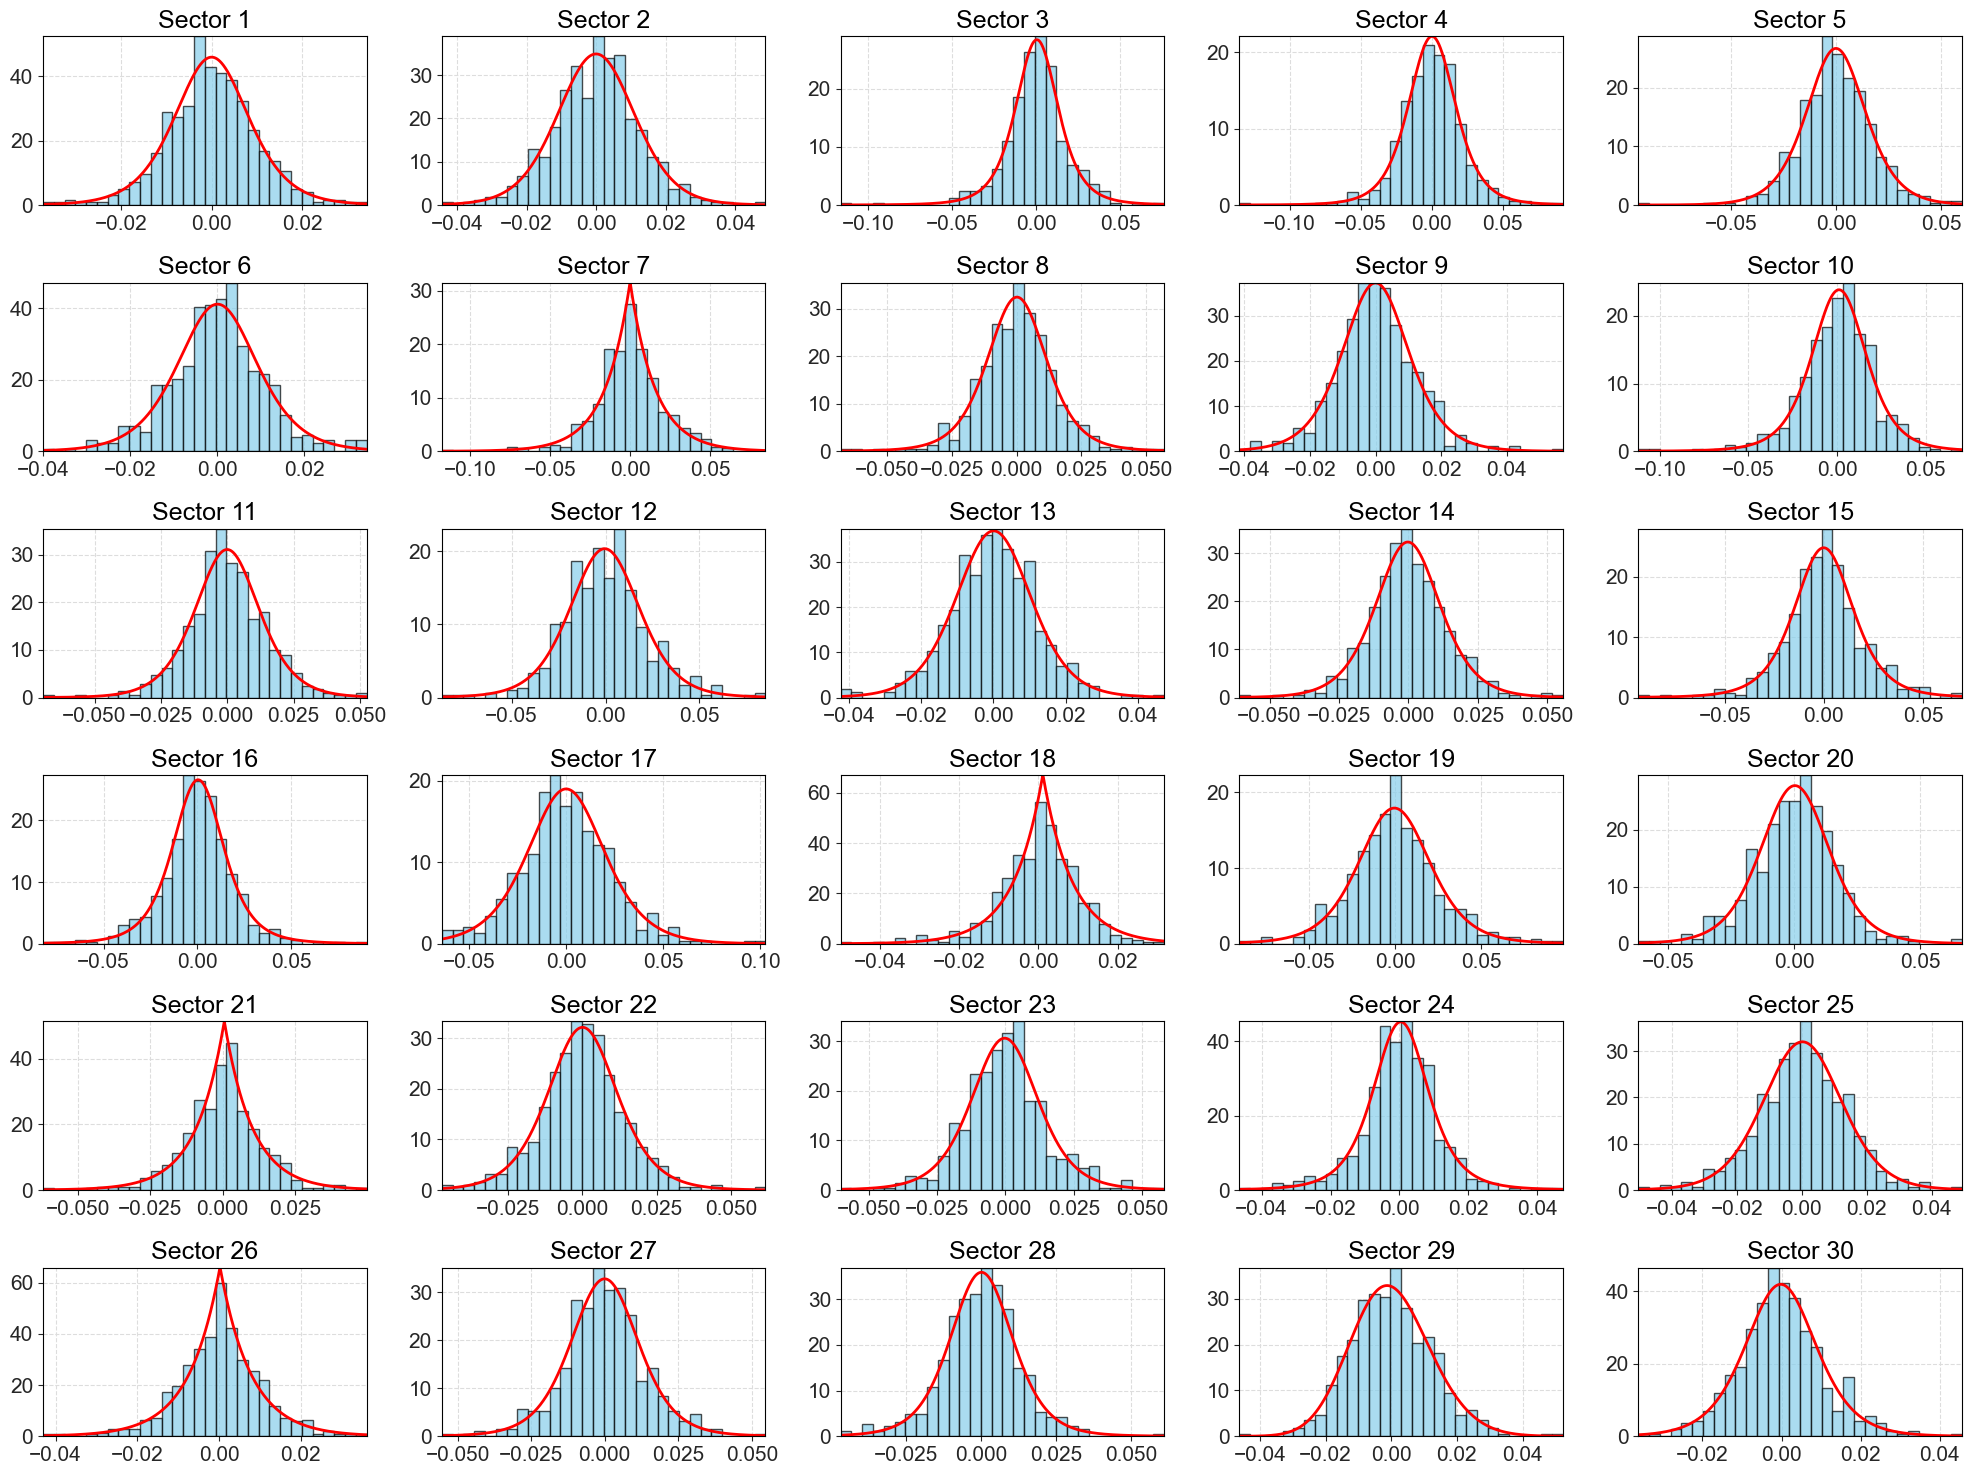


Distribution counts across sectors:
t           16
logistic     9
laplace      4
skewnorm     1
Name: count, dtype: int64

Sector Distribution Summary:
   distribution          mean       std
1      logistic  8.523785e-19  0.009834
2             t -6.526023e-19  0.012284
3             t  4.261893e-19  0.018418
4             t  4.155345e-18  0.022474
5      logistic  6.925575e-19  0.017103
6      logistic -1.331841e-18  0.011019
7       laplace  4.794629e-19  0.021587
8             t -4.728037e-19  0.014676
9      logistic -9.056522e-19  0.012265
10            t  5.860102e-19  0.020739
11     logistic -3.036598e-18  0.014670
12            t -2.304086e-18  0.022327
13            t  2.983325e-18  0.011965
14     logistic  1.491662e-18  0.014114
15            t -9.589258e-19  0.019740
16            t  3.196419e-19  0.019222
17     logistic -2.850141e-18  0.023761
18      laplace -5.060997e-19  0.010120
19            t  2.397315e-19  0.025840
20            t -5.327366e-19  0.016401
21     

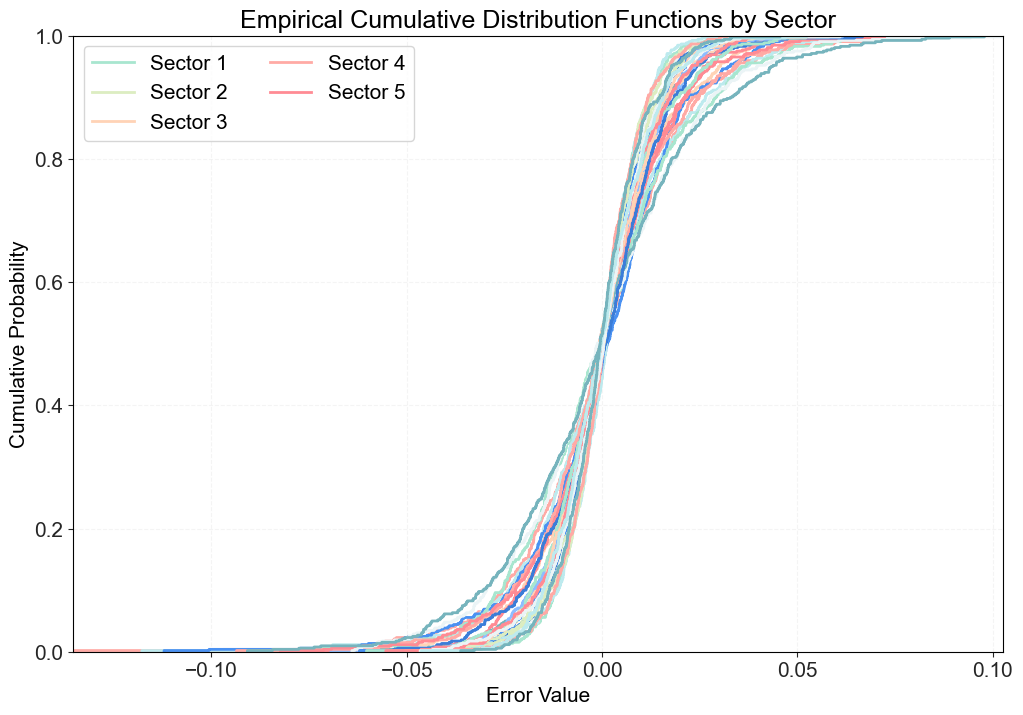

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from fitter import Fitter
import seaborn as sns


# 1. Option to analyze all errors together
all_errors = errors.flatten()  # This combines all sectors into one array

# Create a histogram of all pooled errors
plt.figure(figsize=(12, 7))
plt.hist(all_errors, bins=50, density=True, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Histogram of All Error Terms (All Sectors)')
plt.xlabel('Error Value')
plt.ylabel('Density')
plt.grid(alpha=0.3)

# Fit distributions to the pooled errors
distributions = ['norm', 't', 'laplace', 'cauchy', 'logistic', 'skewnorm']
f = Fitter(all_errors, distributions=distributions)
f.fit()
best_fit = f.get_best(method='sumsquare_error')

# Plot the best fitting distribution
x = np.linspace(min(all_errors), max(all_errors), 1000)
best_dist_name = list(best_fit.keys())[0]
best_dist_params = f.fitted_param[best_dist_name]
dist = getattr(stats, best_dist_name)

# Different distributions have different parameter ordering, handle accordingly
if best_dist_name == 'norm':
    y = dist.pdf(x, *best_dist_params)
elif best_dist_name == 't':
    y = dist.pdf(x, *best_dist_params)
else:
    # This is a simplification - may need adjusting based on the specific distribution
    y = dist.pdf(x, *best_dist_params)

plt.plot(x, y, 'r-', linewidth=2, label=f'Best fit: {best_dist_name}')
plt.legend()
plt.show()

print(f"Best distribution for all pooled errors: {best_dist_name}")
print(f"Parameters: {best_dist_params}")

# 2. Analyze each sector separately (optional)
best_distributions = []
sector_summaries = {}

# Create a subplot grid for all sectors
fig, axes = plt.subplots(6, 5, figsize=(20, 15))  # 6×5 grid accommodates 30 sectors
axes = axes.flatten()

for i in range(30):
    sector_errors = errors[:, i]
    
    # Plot histogram for this sector
    ax = axes[i]
    ax.hist(sector_errors, bins=30, density=True, alpha=0.7, color='skyblue', edgecolor='black')
    ax.set_title(f'Sector {i+1}')
    
    # Fit distributions
    f_sector = Fitter(sector_errors, distributions=distributions)
    f_sector.fit()
    best_sector_fit = f_sector.get_best(method='sumsquare_error')
    best_dist_name = list(best_sector_fit.keys())[0]
    best_distributions.append(best_dist_name)
    
    # Store summary
    sector_summaries[i+1] = {
        'distribution': best_dist_name,
        'parameters': f_sector.fitted_param[best_dist_name],
        'mean': np.mean(sector_errors),
        'std': np.std(sector_errors),
        'min': np.min(sector_errors),
        'max': np.max(sector_errors)
    }
    
    # Plot the best fit line
    x = np.linspace(min(sector_errors), max(sector_errors), 1000)
    dist = getattr(stats, best_dist_name)
    params = f_sector.fitted_param[best_dist_name]
    
    # Different distributions have different parameter ordering
    try:
        y = dist.pdf(x, *params)
        ax.plot(x, y, 'r-', linewidth=2)
    except:
        # Simplified fallback
        pass

plt.tight_layout()
plt.show()

# 3. Summary of distribution fits across sectors
dist_counts = pd.Series(best_distributions).value_counts()
print("\nDistribution counts across sectors:")
print(dist_counts)

# Create a summary dataframe
summary_df = pd.DataFrame.from_dict(sector_summaries, orient='index')
print("\nSector Distribution Summary:")
print(summary_df[['distribution', 'mean', 'std']])

# 4. Optional: Compare the empirical CDFs across sectors
plt.figure(figsize=(12, 8))
for i in range(30):
    sector_errors = errors[:, i]
    # Plot the ECDF for each sector
    sns.ecdfplot(sector_errors, label=f'Sector {i+1}' if i < 5 else '_nolegend_')

plt.title('Empirical Cumulative Distribution Functions by Sector')
plt.xlabel('Error Value')
plt.ylabel('Cumulative Probability')
plt.legend(loc='best', ncol=2)
plt.grid(alpha=0.3)
plt.show()

In [99]:
t_params = MyFunctions.fit_t_distributions(errors)
t_params = pd.DataFrame(t_params, columns=["df", "loc", "scale"])
t_params

,df,loc,scale
0,8.101349,0.000026,0.008558
1,11.648130,0.000014,0.011189
2,3.862802,0.000356,0.013150
3,4.698854,0.000234,0.017116
4,7.154385,-0.000033,0.014466
5,7.355062,0.000023,0.009466
6,4.618008,-0.000073,0.016525
7,5.460540,0.000110,0.011753
8,6.480576,-0.000036,0.010240
9,4.673131,0.001052,0.015849


In [100]:
t_params["loc"] = 0


## Simulation

In [101]:
# Draw random indices according to the given probabilities
sampled_indices = np.random.choice(len(grades_PC4), size=10_000, p=probabilities)

# Get the corresponding copula samples
simulated_copula_samples = grades_PC4[sampled_indices]

#Translate grades to PC4
simulated_PC4 = MyFunctions.CMA_combination(sorted_PC4, cdf_PC4, simulated_copula_samples)
simulated_PC4.shape

(10000, 4)

In [102]:
# How well do simulated PC4 match empirical ones

MyFunctions.compute_returns_statistics(PC4)

,Mean (%),Median (%),Std Dev (%),Min (%),Max (%),Ann. Return (%),Ann. Volatility (%),Sharpe Ratio,Skewness,Kurtosis,VaR 95% (%),VaR 99% (%),JB p-value,Max Drawdown (%)
0,7.449988e-17,0.721826,14.769468,-103.094555,78.388267,3.873994e-15,106.504150,3.637411e-17,-0.850595,8.323566,-24.181410,-38.132678,0.000000e+00,-100.187335
1,-2.430611e-17,-0.231431,7.049149,-32.665656,31.970664,-1.263918e-15,50.832140,-2.486454e-17,-0.097101,2.961439,-10.531352,-16.091149,3.859542e-41,-94.420067
2,1.215305e-16,-0.081016,4.608970,-17.003338,26.922820,6.319588e-15,33.235754,1.901443e-16,0.585565,4.381417,-7.048911,-12.032268,1.877065e-95,-75.120182
3,-5.593734e-17,0.025075,3.557346,-12.516700,12.689854,-2.908742e-15,25.652383,-1.133907e-16,-0.012193,0.758724,-6.058439,-9.365651,2.606757e-03,-51.850805


In [103]:
MyFunctions.compute_returns_statistics(simulated_PC4)

,Mean (%),Median (%),Std Dev (%),Min (%),Max (%),Ann. Return (%),Ann. Volatility (%),Sharpe Ratio,Skewness,Kurtosis,VaR 95% (%),VaR 99% (%),JB p-value,Max Drawdown (%)
Sector_1,-0.033050,0.509524,14.341157,-103.094555,78.388267,-1.718615,103.415556,-0.016619,-0.763387,8.534120,-24.115817,-37.211445,0.000000e+00,-100.429968
Sector_2,0.105044,-0.220601,6.969926,-32.665656,31.970664,5.462270,50.260848,0.108678,-0.057101,2.430020,-10.245743,-16.136375,0.000000e+00,-99.999992
Sector_3,0.017053,-0.044021,4.557533,-17.003338,26.922820,0.886750,32.864836,0.026982,0.541902,4.049488,-7.048911,-11.984513,0.000000e+00,-99.998515
Sector_4,0.025721,0.017839,3.560121,-12.516700,12.689854,1.337507,25.672398,0.052099,0.026268,0.722462,-6.058439,-9.530881,4.475083e-48,-99.668007


In [104]:
# Assuming:
# - eig_vectors contains your eigenvectors (sorted by descending eigenvalues)
# - mean_vector is the original mean of log_returns
# - simulated_PC4 contains your simulated principal components

# Step 1: Create the loading matrix (first 4 eigenvectors)
loading_matrix = eig_vectors[:, :4]

# Step 2: Project simulated PC4 back to return space
simulated_returns_centered = simulated_PC4 @ loading_matrix.T

# Step 3: Add back the mean to get actual returns
simulated_returns = simulated_returns_centered + mean_vector.values
simulated_returns.shape

(10000, 30)

In [105]:
errors.shape

(521, 30)

In [106]:
# Error term

errors_pd = pd.DataFrame(errors)
error_corr = errors_pd.corr() # Not uncorrelated

# As a start using normal dist
errors_mean = np.repeat(0, errors.shape[1])
errors_cov = np.cov(errors, rowvar=False)
simulated_errors = stats.multivariate_normal.rvs(errors_mean, errors_cov, size=10_000)
simulated_errors.shape

(10000, 30)

In [107]:
simulated_returns += simulated_errors
simulated_returns_stats = MyFunctions.compute_returns_statistics(simulated_returns)
log_returns_stats = MyFunctions.compute_returns_statistics(log_returns)
simulated_returns_stats.index = log_returns_stats.index
log_returns_stats - simulated_returns_stats

,Mean (%),Median (%),Std Dev (%),Min (%),Max (%),Ann. Return (%),Ann. Volatility (%),Sharpe Ratio,Skewness,Kurtosis,VaR 95% (%),VaR 99% (%),JB p-value,Max Drawdown (%)
Food,0.014988,0.064415,0.057226,1.636297,-1.674286,0.779379,0.412665,0.043021,-0.231231,0.861553,0.042921,-0.293492,1.122372e-174,40.979004
Beer,0.014259,0.083015,0.071853,-0.695952,3.799744,0.741490,0.518142,0.032531,-0.078035,6.329137,0.217714,0.353507,0.000000e+00,32.930211
Smoke,-0.034237,0.271140,0.059969,-2.405566,-3.498134,-1.780309,0.432445,-0.093518,-0.975550,4.791003,-0.268478,-1.687533,1.653230e-288,17.801439
Games,-0.019139,0.001388,0.073470,5.247971,-6.918322,-0.995208,0.529801,-0.046942,-0.238311,0.385738,-0.223194,-1.197605,1.539969e-22,4.044045
Books,0.013700,0.164599,0.067813,3.857036,-5.340965,0.712395,0.489005,0.027580,-0.078174,-1.491993,-0.213947,-1.779213,1.299720e-56,36.821409
Hshld,0.012199,0.059450,0.063796,2.158610,-1.806718,0.634330,0.460043,0.028651,-0.024156,0.211493,-0.134962,-0.814154,9.395072e-111,26.675451
Clths,0.023568,0.054631,0.054538,8.696823,-4.241516,1.225545,0.393282,0.044853,0.144457,-1.278902,-0.021592,-0.886961,1.327233e-46,38.814384
Hlth,0.004050,0.095821,0.058308,2.970305,-3.445733,0.210598,0.420463,0.000761,-0.053023,-0.522667,-0.197772,-0.820833,1.874933e-35,33.743870
Chems,0.009825,0.048604,0.069668,7.050183,1.371496,0.510909,0.502385,0.018538,0.285807,-0.763331,-0.337957,-1.003879,1.706505e-151,42.907029
Txtls,0.026424,0.208410,0.105937,-3.161763,-0.005115,1.374026,0.763922,0.038055,-0.534762,6.331532,1.119783,-2.199922,0.000000e+00,17.827268


In [108]:
log_returns_stats

,Mean (%),Median (%),Std Dev (%),Min (%),Max (%),Ann. Return (%),Ann. Volatility (%),Sharpe Ratio,Skewness,Kurtosis,VaR 95% (%),VaR 99% (%),JB p-value,Max Drawdown (%)
Food,0.111011,0.227570,2.050100,-12.899113,7.707630,5.772563,14.783485,0.390474,-1.016847,5.793138,-2.989258,-5.688975,1.122372e-174,-28.022995
Beer,0.131463,0.299835,2.336536,-17.451737,14.243439,6.836072,16.848998,0.405726,-0.793794,10.495195,-3.243337,-5.529275,0.000000e+00,-32.927471
Smoke,0.173484,0.543422,2.970051,-20.997633,11.136688,9.021153,21.417341,0.421208,-1.441109,7.347502,-4.725232,-9.065733,1.653230e-288,-50.146370
Games,0.247828,0.295458,3.757800,-17.120012,11.240858,12.887066,27.097881,0.475575,-0.403429,2.025876,-5.897135,-9.982704,1.539969e-22,-59.752711
Books,0.077379,0.272645,3.224331,-18.660922,14.065787,4.023683,23.250984,0.173054,-0.505545,3.335711,-5.047247,-9.589342,1.299720e-56,-54.156830
Hshld,0.128976,0.245940,2.187171,-12.487255,9.158972,6.706771,15.771916,0.425235,-0.705540,4.678095,-3.354605,-6.593688,9.395072e-111,-29.403717
Clths,0.113979,0.251188,3.563188,-16.914002,15.137182,5.926925,25.694511,0.230669,-0.327294,3.091702,-5.417173,-9.654912,1.327233e-46,-52.421848
Hlth,0.156696,0.318233,2.402768,-12.212980,8.545961,8.148182,17.326608,0.470270,-0.516620,2.546945,-3.820164,-6.929878,1.874933e-35,-25.054947
Chems,0.098297,0.163152,3.005049,-15.589639,19.285796,5.111444,21.669720,0.235880,-0.242869,5.700688,-4.721385,-8.425017,1.706505e-151,-48.367725
Txtls,-0.035581,0.255556,5.249036,-43.330315,30.062155,-1.850190,37.851334,-0.048880,-1.073064,14.332123,-6.582031,-16.603967,0.000000e+00,-82.172732


In [109]:
simulated_returns_stats.head()

,Mean (%),Median (%),Std Dev (%),Min (%),Max (%),Ann. Return (%),Ann. Volatility (%),Sharpe Ratio,Skewness,Kurtosis,VaR 95% (%),VaR 99% (%),JB p-value,Max Drawdown (%)
Food,0.096023,0.163155,1.992874,-14.535410,9.381916,4.993183,14.370820,0.347453,-0.785616,4.931585,-3.032179,-5.395483,0.000000e+00,-69.002000
Beer,0.117204,0.216820,2.264682,-16.755785,10.443695,6.094583,16.330856,0.373194,-0.715759,4.166059,-3.461050,-5.882782,0.000000e+00,-65.857682
Smoke,0.207720,0.272282,2.910082,-18.592067,14.634822,10.801463,20.984896,0.514726,-0.465559,2.556499,-4.456755,-7.378200,0.000000e+00,-67.947809
Games,0.266967,0.294070,3.684330,-22.367983,18.159180,13.882274,26.568080,0.522517,-0.165118,1.640137,-5.673940,-8.785099,1.467637e-253,-63.796756
Books,0.063679,0.108046,3.156519,-22.517958,19.406752,3.311288,22.761979,0.145475,-0.427371,4.827705,-4.833300,-7.810128,0.000000e+00,-90.978239


In [110]:
# Comparing errors
MyFunctions.compute_returns_statistics(errors).head()

,Mean (%),Median (%),Std Dev (%),Min (%),Max (%),Ann. Return (%),Ann. Volatility (%),Sharpe Ratio,Skewness,Kurtosis,VaR 95% (%),VaR 99% (%),JB p-value,Max Drawdown (%)
Sector_1,8.573729e-17,0.000977,0.984299,-3.717112,3.414624,4.458339e-15,7.097884,6.281223e-16,-0.078078,0.976475,-1.575610,-2.587596,3.808877e-05,-21.406644
Sector_2,-1.215305e-16,0.046865,1.229599,-4.437867,4.871699,-6.319588e-15,8.866765,-7.127275e-16,0.009418,0.663001,-2.033929,-2.994380,1.087066e-02,-29.959405
Sector_3,-1.020524e-16,0.034225,1.843618,-11.628406,7.603645,-5.306722e-15,13.294516,-3.991663e-16,-0.633742,4.795894,-3.137151,-4.667249,4.242307e-114,-51.616766
Sector_4,4.025491e-16,0.006590,2.249592,-13.534708,9.253860,2.093255e-14,16.222041,1.290377e-15,-0.280652,3.609708,-3.431514,-5.870256,4.551808e-62,-62.897404
Sector_5,8.032669e-17,0.027255,1.711932,-9.409643,5.991126,4.176988e-15,12.344918,3.383569e-16,-0.163163,2.202018,-2.686278,-3.997788,2.064858e-23,-32.731444


In [111]:
MyFunctions.compute_returns_statistics(simulated_errors).head()

,Mean (%),Median (%),Std Dev (%),Min (%),Max (%),Ann. Return (%),Ann. Volatility (%),Sharpe Ratio,Skewness,Kurtosis,VaR 95% (%),VaR 99% (%),JB p-value,Max Drawdown (%)
Sector_1,-0.012073,-0.023991,0.989098,-3.837253,3.343894,-0.627821,7.132491,-0.088023,0.013565,-0.055018,-1.627034,-2.288344,0.450624,-87.938488
Sector_2,-0.009302,-0.009435,1.226301,-4.469019,4.624458,-0.483707,8.842983,-0.054699,-0.000500,-0.056551,-2.022786,-2.838270,0.506611,-88.947770
Sector_3,0.036282,0.044805,1.847260,-8.110241,7.002901,1.886680,13.320783,0.141634,-0.029324,0.038627,-2.997171,-4.385196,0.361571,-67.553677
Sector_4,0.028951,0.019113,2.249142,-7.984981,9.155412,1.505470,16.218795,0.092823,0.039828,0.029958,-3.636101,-5.170260,0.222929,-87.334774
Sector_5,-0.004757,-0.007026,1.709244,-6.430093,6.399358,-0.247345,12.325533,-0.020068,-0.021343,-0.024553,-2.819994,-4.027257,0.599794,-97.879651


# One copula for both PC4 and errors

In [112]:
# Idea: one copula for both PC4 and errors (500 x 34). Can choose marginals freely

factor_error_returns = pd.concat([PC4_pd.reset_index(drop=True), errors_pd.reset_index(drop=True)], axis=1)
factor_error_returns.shape

(521, 34)

In [119]:
simulated_PC4.shape

(10000, 4)

In [122]:
exposures.iloc[1:, :]

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
PC1,0.097987,0.106018,0.112674,0.177763,0.177384,0.098243,0.188136,0.105709,0.184213,0.279323,...,0.127886,0.139966,0.151416,0.136667,0.181069,0.171457,0.119473,0.165035,0.180769,0.13859
PC2,-0.042315,-0.09442,-0.054386,-0.085328,0.015675,-0.10039,-0.117247,-0.059408,-0.006821,-0.15095,...,-0.020412,-0.123277,-0.124,-0.048812,-0.065498,-0.051696,-0.11344,-0.093868,-0.049383,-0.013878
PC3,-0.066096,-0.049857,-0.1134,0.207659,-0.056851,-0.025829,0.007094,0.026434,-0.055331,-0.419963,...,-0.02942,0.181597,0.183917,-0.087951,-0.02532,-0.055899,0.1752,-0.004459,-0.086902,-0.082089
PC4,0.279561,0.314177,0.368217,0.07619,-0.029314,0.28772,0.090928,0.218067,-0.035052,-0.439372,...,0.18425,0.099526,0.063916,0.096546,0.003429,0.04368,0.143183,0.093291,0.034052,0.09156


In [136]:
simulated_errors.shape

(10000, 30)

In [129]:
simulated_PC4 @ exposures.iloc[1:, :].values

array([[-0.008835124701132893, -0.007737125302650806,
        -0.011103480936510412, ..., -0.002155996390801984,
        -0.0020190059317402404, -0.00477058878477521],
       [0.0071051635823951124, 0.008527266162214383, 0.01086520730501615,
        ..., -0.0019924165186896528, -0.0029041885776458255,
        -0.0003879800642538861],
       [0.0031344600123363727, 0.0020574444161433414,
        0.003864411228029084, ..., 0.0031194833866331046,
        0.005255272415131729, 0.004864209534467164],
       ...,
       [-0.004052329374037746, -0.0039551620848208135,
        -0.004791458064859636, ..., -0.000796322519008428,
        0.0007860807085922577, -0.000928960898981976],
       [0.02389926200774608, 0.022236174457084493, 0.03951193614036279,
        ..., -0.0024361189616321777, 0.014656181468284103,
        0.017121623953773545],
       [0.0037987129692125636, 0.005266331237204901,
        0.004934683038362957, ..., 0.007690987486891824,
        0.00858097867282471, 0.005626804165456

In [134]:
simulated_returns_new = exposures.loc["Alpha"].values + simulated_PC4 @ exposures.iloc[1:, :].values + simulated_errors

In [168]:

# 1. Separate joint factor & error distribution into marginals and copula
J, N = factor_error_returns.shape
obs = len(factor_error_returns)
probabilities = np.repeat(1/obs, obs)
x, u, U = MyFunctions.CMA_separation(factor_error_returns.values, probabilities)

# 2. Fit t-distributions to PC4 & errors
t_params_PC4 = MyFunctions.fit_t_distributions(factor_error_returns.iloc[:, :4])
half_point = int(J / 2) # error distributions using 5-year historical data, consistent with exposure to factors
t_params_errors = MyFunctions.fit_t_distributions(factor_error_returns.iloc[half_point:, 4:])
t_params = t_params_PC4 + t_params_errors # concatenate 2 lists

# 3. Simulate returns using empirical copula with t-marginals
simulations = 10_000
sampled_indices = np.random.choice(len(U), size=simulations, p=probabilities) # sample index
U_simulated = U[sampled_indices] # Get the corresponding copula samples

simulated_returns = np.zeros((simulations, N))

for j in range(N):
    df, loc, scale = t_params[j]
    simulated_returns[:, j] = stats.t.ppf(U_simulated[:, j], df=df, loc=loc, scale=scale)

# Step 4: Combine PC4 and errors
exposures = pd.DataFrame(index=["Alpha", "PC1", "PC2", "PC3", "PC4"], columns=log_returns.columns)
sectors = 30
# Estimating factor exposure
for sector in range(sectors):
    y = log_returns_np[half_point:, sector] #only use most recent 5 years
    X = sm.add_constant(PC4.iloc[half_point:, :])
    model = sm.OLS(y, X).fit()
    exposures.iloc[:, sector] = model.params
exposures = exposures.astype(float)

loading_matrix = eig_vectors[:, :4]
simulated_PC4 = simulated_returns[:, :4]
simulated_errors = simulated_returns[:, 4:]

simulated_PC4_returns = simulated_PC4 @ loading_matrix.T

simulated_returns = simulated_PC4_returns + simulated_errors + mean_vector.values # Add back the mean to get actual returns
simulated_returns_new = exposures.loc["Alpha"].values + simulated_PC4 @ exposures.iloc[1:, :].values + simulated_errors

simulated_returns_linear = np.exp(simulated_returns) - 1
print(simulated_returns.shape)

# 4. Analyze the simulated returns
simulated_stats = MyFunctions.compute_returns_statistics(simulated_returns)
simulated_stats.head()

(10000, 30)


,Mean (%),Median (%),Std Dev (%),Min (%),Max (%),Ann. Return (%),Ann. Volatility (%),Sharpe Ratio,Skewness,Kurtosis,VaR 95% (%),VaR 99% (%),JB p-value,Max Drawdown (%)
Sector_1,-0.058263,-0.183364,2.033865,-5.435987,8.012752,-3.029693,14.666407,-0.206574,0.339289,0.820651,-3.367010,-4.587940,3.681924e-103,-99.963853
Sector_2,-0.077136,-0.185142,2.363314,-6.650653,9.791946,-4.011070,17.042099,-0.235362,0.380908,0.535426,-3.603700,-5.060312,4.480356e-79,-99.997296
Sector_3,0.014268,-0.062962,2.915902,-9.986567,10.564136,0.741926,21.026869,0.035285,0.132823,0.665884,-5.048346,-6.988490,4.086363e-47,-98.710980
Sector_4,-0.057077,0.084601,3.736581,-15.523190,21.918096,-2.967989,26.944872,-0.110150,0.066525,3.495343,-6.138292,-10.920832,0.000000e+00,-99.999813
Sector_5,-0.092029,-0.122524,3.150698,-15.007882,15.359282,-4.785491,22.720003,-0.210629,-0.118896,3.223740,-4.747912,-8.447898,0.000000e+00,-99.999942


In [169]:
MyFunctions.compute_returns_statistics(simulated_returns_new).head()

,Mean (%),Median (%),Std Dev (%),Min (%),Max (%),Ann. Return (%),Ann. Volatility (%),Sharpe Ratio,Skewness,Kurtosis,VaR 95% (%),VaR 99% (%),JB p-value,Max Drawdown (%)
Sector_1,-0.049335,-0.138507,2.036489,-5.519479,8.180476,-2.565439,14.685331,-0.174694,0.337981,0.851706,-3.452050,-4.559493,1.569280e-107,-99.912010
Sector_2,-0.088359,-0.235759,2.410919,-6.856860,9.822269,-4.594689,17.385386,-0.264285,0.380736,0.544187,-3.779937,-5.228273,6.994089e-80,-99.999215
Sector_3,0.101749,0.045119,2.816445,-9.587265,10.443384,5.290949,20.309677,0.260514,0.120204,0.683086,-4.602094,-6.551013,4.688213e-48,-80.719908
Sector_4,-0.178374,-0.006598,3.634646,-15.106502,21.110068,-9.275447,26.209802,-0.353892,0.065579,3.414898,-6.118608,-10.730048,0.000000e+00,-100.000000
Sector_5,-0.032991,-0.087831,3.076659,-15.421702,15.073833,-1.715527,22.186103,-0.077324,-0.154600,3.581397,-4.444510,-7.893851,0.000000e+00,-99.974709


In [145]:
log_returns_stats

,Mean (%),Median (%),Std Dev (%),Min (%),Max (%),Ann. Return (%),Ann. Volatility (%),Sharpe Ratio,Skewness,Kurtosis,VaR 95% (%),VaR 99% (%),JB p-value,Max Drawdown (%)
Food,0.111011,0.227570,2.050100,-12.899113,7.707630,5.772563,14.783485,0.390474,-1.016847,5.793138,-2.989258,-5.688975,1.122372e-174,-28.022995
Beer,0.131463,0.299835,2.336536,-17.451737,14.243439,6.836072,16.848998,0.405726,-0.793794,10.495195,-3.243337,-5.529275,0.000000e+00,-32.927471
Smoke,0.173484,0.543422,2.970051,-20.997633,11.136688,9.021153,21.417341,0.421208,-1.441109,7.347502,-4.725232,-9.065733,1.653230e-288,-50.146370
Games,0.247828,0.295458,3.757800,-17.120012,11.240858,12.887066,27.097881,0.475575,-0.403429,2.025876,-5.897135,-9.982704,1.539969e-22,-59.752711
Books,0.077379,0.272645,3.224331,-18.660922,14.065787,4.023683,23.250984,0.173054,-0.505545,3.335711,-5.047247,-9.589342,1.299720e-56,-54.156830
Hshld,0.128976,0.245940,2.187171,-12.487255,9.158972,6.706771,15.771916,0.425235,-0.705540,4.678095,-3.354605,-6.593688,9.395072e-111,-29.403717
Clths,0.113979,0.251188,3.563188,-16.914002,15.137182,5.926925,25.694511,0.230669,-0.327294,3.091702,-5.417173,-9.654912,1.327233e-46,-52.421848
Hlth,0.156696,0.318233,2.402768,-12.212980,8.545961,8.148182,17.326608,0.470270,-0.516620,2.546945,-3.820164,-6.929878,1.874933e-35,-25.054947
Chems,0.098297,0.163152,3.005049,-15.589639,19.285796,5.111444,21.669720,0.235880,-0.242869,5.700688,-4.721385,-8.425017,1.706505e-151,-48.367725
Txtls,-0.035581,0.255556,5.249036,-43.330315,30.062155,-1.850190,37.851334,-0.048880,-1.073064,14.332123,-6.582031,-16.603967,0.000000e+00,-82.172732


In [ ]:
MyFunctions.compute_returns_statistics(simulated_returns_linear)

In [ ]:
original_linear_returns = np.exp(log_returns) - 1
MyFunctions.compute_returns_statistics(original_linear_returns)

In [ ]:
mean_vector*100

In [52]:
# True simulation instead of re-sampling

import numpy as np
from scipy import interpolate

def simulate_with_empirical_copula(X, p, num_simulations, marginal_type='empirical', t_df=None):
    """
    Simulate returns using an empirical copula structure from the original data.
    
    Parameters:
    X (numpy.ndarray): Original data matrix, size J x N
    p (numpy.ndarray): Probability vector, size J
    num_simulations (int): Number of simulations to generate
    marginal_type (str): Type of marginals to use ('empirical', 'normal', 'student_t')
    t_df (float or list): Degrees of freedom for Student's t marginals (if marginal_type='student_t')
    
    Returns:
    numpy.ndarray: Simulated data matrix, size num_simulations x N
    """
    J, N = X.shape
    
    # Step 1: Separate the original data to get the copula structure
    x_orig, u_orig, U_orig = CMA_separation(X, p)
    
    # Step 2: Generate random uniform variables for simulations
    U_sim = np.random.uniform(0, 1, size=(num_simulations, N))
    
    # Step 3: Prepare marginals based on the specified type
    if marginal_type == 'empirical':
        # Use the original empirical marginals
        x_sim = x_orig
        u_sim = u_orig
    elif marginal_type == 'normal':
        # Create standard normal marginals
        x_sim = np.zeros((J, N))
        u_sim = np.zeros((J, N))
        for n in range(N):
            # Create evenly spaced points in the probability space
            u_sim[:, n] = np.linspace(1/(2*J), 1-1/(2*J), J)
            # Map to normal quantiles
            x_sim[:, n] = np.sort(stats.norm.ppf(u_sim[:, n]))
    elif marginal_type == 'student_t':
        # Create Student's t marginals
        x_sim = np.zeros((J, N))
        u_sim = np.zeros((J, N))
        
        # Handle different df for each dimension if provided as a list
        if isinstance(t_df, (list, np.ndarray)):
            if len(t_df) != N:
                raise ValueError(f"Length of t_df ({len(t_df)}) must match number of dimensions ({N})")
            dfs = t_df
        else:
            dfs = [t_df] * N
            
        for n in range(N):
            # Create evenly spaced points in the probability space
            u_sim[:, n] = np.linspace(1/(2*J), 1-1/(2*J), J)
            # Map to Student's t quantiles
            x_sim[:, n] = np.sort(stats.t.ppf(u_sim[:, n], df=dfs[n]))
    else:
        raise ValueError("marginal_type must be 'empirical', 'normal', or 'student_t'")
    
    # Step 4: Combine the random uniforms with the desired marginals
    X_sim = CMA_combination(x_sim, u_sim, U_sim)
    
    return X_sim

In [74]:
a, b, loc, scale = stats.jf_skew_t.fit(errors[:, 2])

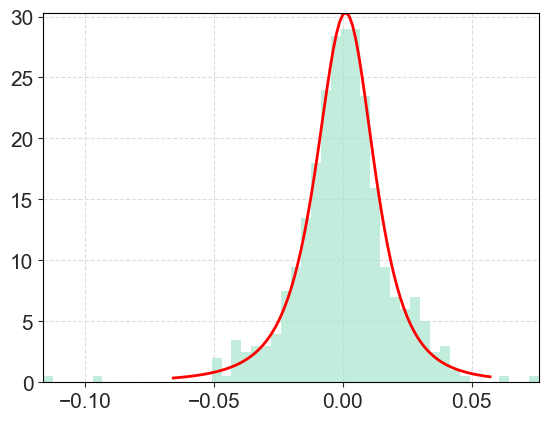

In [91]:
from scipy.stats import jf_skew_t
x = np.linspace(jf_skew_t.ppf(0.01, a, b, loc, scale),
                jf_skew_t.ppf(0.99, a, b, loc, scale), 100)
#ax.plot(x, jf_skew_t.pdf(x, a, b),
 #      'r-', lw=5, alpha=0.6, label='jf_skew_t pdf')

sect3_err = errors[:, 2]
fitted_dist = stats.jf_skew_t.pdf(x, a, b, loc, scale)

fig, ax = plt.subplots()
ax.hist(errors[:, 2], bins=50, density=True, alpha=0.7, 
                label='Actual Errors')
ax.plot(x, fitted_dist, 'r-', lw=2, label='Fitted t-distribution')
plt.show()

In [ ]:
# To do: go through. Claude suggestion for exponential decay loadings matrix

import numpy as np
import pandas as pd
from scipy.linalg import eigh

def pca_with_weighted_loadings(returns, half_life_weeks=26, n_components=4):
    """
    Perform PCA but calculate loadings with exponential weighting.
    
    Parameters:
    -----------
    returns : pandas.DataFrame
        DataFrame of weekly returns
    half_life_weeks : int
        Half-life in weeks for exponential weighting of loadings
    n_components : int
        Number of principal components to extract
        
    Returns:
    --------
    tuple
        (principal_components, weighted_loading_matrix, standard_loading_matrix, 
         eigenvalues, mean_vector)
    """
    # Compute standard PCA using full history
    mean_vector = returns.mean()
    centered_returns = returns - mean_vector
    
    # Standard covariance matrix and PCA
    cov_matrix = centered_returns.cov()
    eigenvalues, eigenvectors = eigh(cov_matrix)
    
    # Sort by descending eigenvalue
    idx = eigenvalues.argsort()[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]
    
    # Extract standard loading matrix (first n_components eigenvectors)
    standard_loading_matrix = eigenvectors[:, :n_components]
    
    # Project data onto principal components (using all history)
    principal_components = centered_returns @ standard_loading_matrix
    
    # Now calculate exponentially weighted loadings
    # Generate weights based on recency (newest = highest weight)
    dates = returns.index
    if isinstance(dates, pd.DatetimeIndex):
        # For datetime index
        weeks_from_end = [(dates[-1] - date).days / 7 for date in dates]
    else:
        # For non-datetime index, assume weekly frequency
        weeks_from_end = np.arange(len(returns))[::-1]
    
    # Calculate exponential weights
    weights = np.exp(-np.array(weeks_from_end) / half_life_weeks)
    weights = weights / weights.sum()  # Normalize
    
    # Compute weighted regression of returns on principal components
    weighted_loading_matrix = np.zeros((returns.shape[1], n_components))
    
    # For each asset/sector
    for i in range(returns.shape[1]):
        # For each principal component, regress the asset returns on the PC
        # with exponential weighting
        for j in range(n_components):
            # Simple weighted OLS estimation
            y = centered_returns.iloc[:, i].values
            x = principal_components.iloc[:, j].values
            
            # Weighted regression coefficient calculation
            numerator = np.sum(weights * x * y)
            denominator = np.sum(weights * x * x)
            
            if denominator != 0:
                weighted_loading_matrix[i, j] = numerator / denominator
            else:
                # Fall back to standard loading if denominator is zero
                weighted_loading_matrix[i, j] = standard_loading_matrix[i, j]
    
    return principal_components, weighted_loading_matrix, standard_loading_matrix, eigenvalues, mean_vector

def simulate_returns_from_components(simulated_pc4, loading_matrix, mean_vector, add_errors=True, error_matrix=None):
    """
    Convert simulated principal components back to returns.
    
    Parameters:
    -----------
    simulated_pc4 : numpy.ndarray
        Simulated principal components
    loading_matrix : numpy.ndarray
        Loading matrix to use for projection
    mean_vector : numpy.ndarray
        Mean vector of original returns
    add_errors : bool
        Whether to add back reconstruction errors
    error_matrix : pandas.DataFrame or numpy.ndarray, optional
        Historical PCA reconstruction errors
        
    Returns:
    --------
    numpy.ndarray
        Simulated returns
    """
    # Project PCs back to return space
    simulated_returns_centered = simulated_pc4 @ loading_matrix.T
    
    # Add back the mean
    simulated_returns = simulated_returns_centered + mean_vector
    
    # Add errors if requested
    if add_errors and error_matrix is not None:
        if isinstance(error_matrix, pd.DataFrame):
            error_matrix = error_matrix.values
            
        # Sample errors with replacement
        error_indices = np.random.choice(len(error_matrix), size=len(simulated_pc4), replace=True)
        sampled_errors = error_matrix[error_indices]
        
        # Add to returns
        simulated_returns += sampled_errors
    
    return simulated_returns

# Example usage:
"""
# 1. Extract principal components and calculate weighted loadings
pcs, weighted_loadings, standard_loadings, eigenvalues, mean_vector = pca_with_weighted_loadings(
    weekly_returns,
    half_life_weeks=26,  # 6-month half-life
    n_components=4
)

# 2. Calculate errors using weighted loadings
reconstructed_returns_centered = pcs.values @ weighted_loadings.T
reconstructed_returns = reconstructed_returns_centered + mean_vector
errors = weekly_returns.loc[pcs.index] - reconstructed_returns

# 3. Use your existing code to simulate PC4 values via empirical copula
# sampled_indices = np.random.choice(len(grades_PC4), size=10_000, p=probabilities)
# simulated_copula_samples = grades_PC4[sampled_indices]
# simulated_PC4 = MyFunctions.CMA_combination(sorted_PC4, cdf_PC4, simulated_copula_samples)

# 4. Convert simulated PC4 back to returns using weighted loadings
simulated_returns = simulate_returns_from_components(
    simulated_PC4,
    weighted_loadings,
    mean_vector,
    add_errors=True,
    error_matrix=errors
)
"""

# Panic copula

In [43]:
# Split data-set into two: normal and panic

print(log_returns.shape)


(521, 30)


In [44]:
import numpy as np
import pandas as pd
from sklearn.covariance import MinCovDet

def split_returns_by_mve_std(returns_df, std_multiplier=2, contamination=0.05):
    """
    Split stock returns into calm and panic conditions based on the Minimum Volume Ellipsoid method,
    using a standard deviation criterion for the cutoff.
    
    Parameters:
    returns_df (pandas.DataFrame): DataFrame of stock returns, shape (n_weeks, n_stocks)
    std_multiplier (float): Number of standard deviations above mean to use as cutoff (default: 2)
    contamination (float): Expected proportion of outliers for the MVE fit, between 0 and 0.5
    
    Returns:
    tuple: (calm_returns, panic_returns, is_panic)
        calm_returns (pandas.DataFrame): Returns during calm conditions
        panic_returns (pandas.DataFrame): Returns during panic conditions
        is_panic (pandas.Series): Boolean Series indicating panic weeks (True for panic)
    """
    # Check if the input is a pandas DataFrame
    if not isinstance(returns_df, pd.DataFrame):
        raise TypeError("Input must be a pandas DataFrame")
    
    # Convert DataFrame to numpy array for processing
    X = returns_df.values
    
    # Fit Minimum Volume Ellipsoid (using MinCovDet which is more robust)
    mve = MinCovDet(support_fraction=1-contamination, random_state=42)
    mve.fit(X)
    
    # Compute Mahalanobis distances
    mahalanobis_dist = np.sqrt(mve.mahalanobis(X))
    
    # Calculate mean and standard deviation of the Mahalanobis distances
    mean_dist = np.mean(mahalanobis_dist)
    std_dist = np.std(mahalanobis_dist)
    
    # Set cutoff as mean + std_multiplier * std
    cutoff = mean_dist + std_multiplier * std_dist
    
    # Classify observations as panic if their Mahalanobis distance exceeds the cutoff
    is_panic = pd.Series(mahalanobis_dist > cutoff, index=returns_df.index)
    
    # Split the data
    calm_returns = returns_df[~is_panic]
    panic_returns = returns_df[is_panic]
    
    # Print summary statistics
    print(f"Total observations: {len(returns_df)}")
    print(f"Panic observations: {len(panic_returns)} ({len(panic_returns)/len(returns_df)*100:.2f}%)")
    print(f"Calm observations: {len(calm_returns)} ({len(calm_returns)/len(returns_df)*100:.2f}%)")
    print(f"Mahalanobis distance cutoff: {cutoff:.4f} (mean: {mean_dist:.4f}, std: {std_dist:.4f})")
    
    return calm_returns, panic_returns, is_panic

def plot_mve_results_with_distances(returns_df, is_panic, mahalanobis_dist, cutoff):
    """
    Plot the results of the MVE-based panic detection, including a histogram of Mahalanobis distances.
    
    Parameters:
    returns_df (pandas.DataFrame): Original returns data
    is_panic (pandas.Series): Boolean Series indicating panic periods
    mahalanobis_dist (numpy.ndarray): Mahalanobis distances for each observation
    cutoff (float): Cutoff value used to identify panic observations
    """
    import matplotlib.pyplot as plt
    from sklearn.decomposition import PCA
    
    # Create figure with 2 subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Subplot 1: PCA visualization
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(returns_df.values)
    
    # Create DataFrame for plotting
    plot_df = pd.DataFrame(
        data=pca_result,
        columns=['PC1', 'PC2'],
        index=returns_df.index
    )
    plot_df['is_panic'] = is_panic
    
    calm = plot_df[~plot_df['is_panic']]
    panic = plot_df[plot_df['is_panic']]
    
    ax1.scatter(calm['PC1'], calm['PC2'], c='blue', alpha=0.5, label='Calm')
    ax1.scatter(panic['PC1'], panic['PC2'], c='red', alpha=0.7, label='Panic')
    
    # Add explained variance information
    explained_var = pca.explained_variance_ratio_
    ax1.set_xlabel(f'PC1 ({explained_var[0]*100:.1f}% variance)')
    ax1.set_ylabel(f'PC2 ({explained_var[1]*100:.1f}% variance)')
    ax1.set_title('PCA Visualization of Returns')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Subplot 2: Histogram of Mahalanobis distances
    hist_data = pd.Series(mahalanobis_dist, index=returns_df.index)
    hist_calm = hist_data[~is_panic]
    hist_panic = hist_data[is_panic]
    
    ax2.hist(hist_calm, bins=30, alpha=0.5, color='blue', label='Calm')
    ax2.hist(hist_panic, bins=15, alpha=0.7, color='red', label='Panic')
    ax2.axvline(x=cutoff, color='black', linestyle='--', label=f'Cutoff: {cutoff:.2f}')
    
    ax2.set_xlabel('Mahalanobis Distance')
    ax2.set_ylabel('Frequency')
    ax2.set_title('Distribution of Mahalanobis Distances')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    return fig

# Example usage function
def analyze_stock_returns_with_mve(returns_df, std_multiplier=2):
    """
    Analyze stock returns using the MVE method with standard deviation cutoff.
    
    Parameters:
    returns_df (pandas.DataFrame): DataFrame of stock returns
    std_multiplier (float): Number of standard deviations to use for cutoff
    
    Returns:
    tuple: Analysis results including calm and panic DataFrames
    """
    # Fit MVE model
    mve = MinCovDet(support_fraction=0.95, random_state=42)
    mve.fit(returns_df.values)
    
    # Compute Mahalanobis distances
    mahalanobis_dist = np.sqrt(mve.mahalanobis(returns_df.values))
    
    # Calculate cutoff
    mean_dist = np.mean(mahalanobis_dist)
    std_dist = np.std(mahalanobis_dist)
    cutoff = mean_dist + std_multiplier * std_dist
    
    # Identify panic periods
    is_panic = pd.Series(mahalanobis_dist > cutoff, index=returns_df.index)
    
    # Split the data
    calm_returns = returns_df[~is_panic]
    panic_returns = returns_df[is_panic]
    
    # Print summary
    print(f"Total observations: {len(returns_df)}")
    print(f"Panic observations: {len(panic_returns)} ({len(panic_returns)/len(returns_df)*100:.2f}%)")
    print(f"Calm observations: {len(calm_returns)} ({len(calm_returns)/len(returns_df)*100:.2f}%)")
    print(f"Mahalanobis distance cutoff: {cutoff:.4f} (mean: {mean_dist:.4f}, std: {std_dist:.4f})")
    
    # Create visualization
    import matplotlib.pyplot as plt
    fig = plot_mve_results_with_distances(returns_df, is_panic, mahalanobis_dist, cutoff)
    plt.show()
    
    return calm_returns, panic_returns, is_panic, mahalanobis_dist, cutoff

Total observations: 521
Panic observations: 20 (3.84%)
Calm observations: 501 (96.16%)
Mahalanobis distance cutoff: 11.1041 (mean: 6.2259, std: 2.4391)


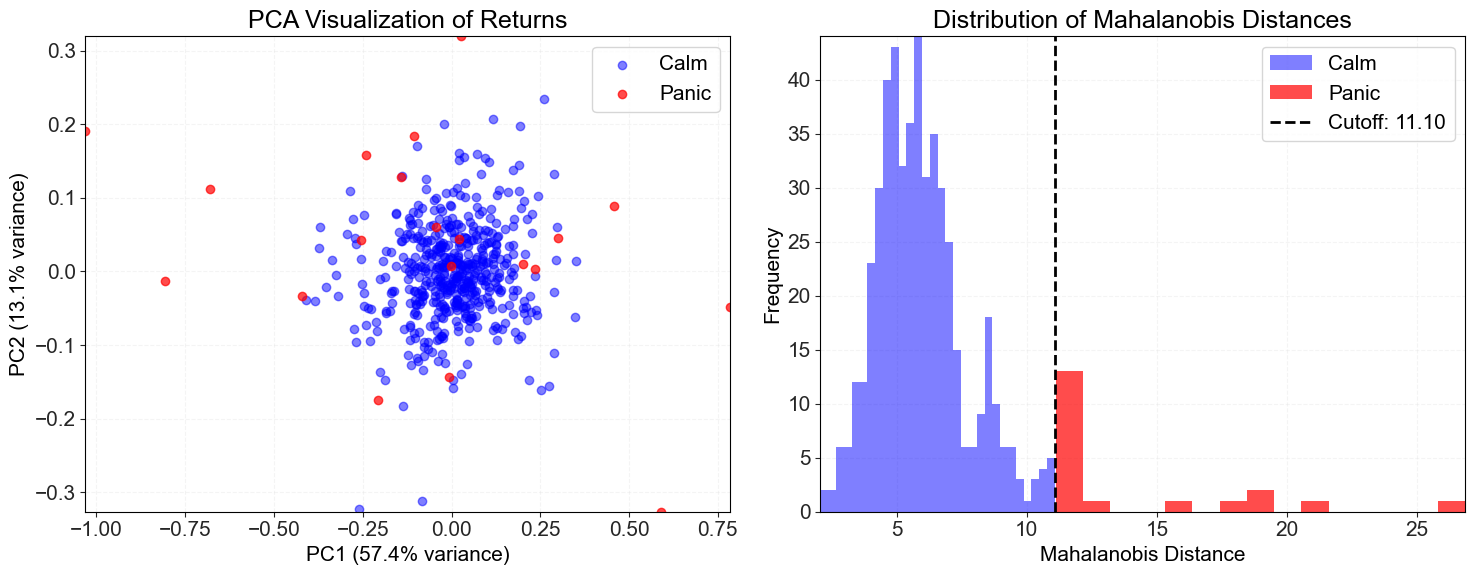

In [45]:
results = analyze_stock_returns_with_mve(log_returns)
calm_returns, panic_returns, is_panic, distances, cutoff = results

In [51]:
panic_returns.corr()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
Food,1.000000,0.971490,0.861389,0.667587,0.767871,0.899360,0.822247,0.841399,0.824712,0.721332,...,0.849557,0.847063,0.903034,0.899517,0.850797,0.870429,0.720321,0.869291,0.829545,0.855382
Beer,0.971490,1.000000,0.893993,0.674920,0.754024,0.903022,0.853568,0.838950,0.805312,0.763937,...,0.836436,0.854747,0.904177,0.875540,0.860946,0.870585,0.684530,0.887967,0.836575,0.824310
Smoke,0.861389,0.893993,1.000000,0.457001,0.591185,0.851000,0.668028,0.666142,0.606865,0.578982,...,0.711016,0.655934,0.762107,0.715743,0.657501,0.679711,0.485117,0.716952,0.674942,0.661199
Games,0.667587,0.674920,0.457001,1.000000,0.683085,0.676470,0.810073,0.780577,0.723254,0.527905,...,0.775832,0.860826,0.805701,0.692711,0.764552,0.704742,0.852176,0.778847,0.710354,0.713449
Books,0.767871,0.754024,0.591185,0.683085,1.000000,0.704276,0.891050,0.772473,0.837286,0.777758,...,0.847740,0.806476,0.833403,0.873582,0.908978,0.914059,0.696251,0.897864,0.939191,0.936873
Hshld,0.899360,0.903022,0.851000,0.676470,0.704276,1.000000,0.813967,0.841033,0.769252,0.618786,...,0.826211,0.828516,0.901226,0.850553,0.823142,0.816358,0.769362,0.836787,0.782134,0.785950
Clths,0.822247,0.853568,0.668028,0.810073,0.891050,0.813967,1.000000,0.803112,0.858819,0.797935,...,0.821645,0.890034,0.900689,0.898585,0.947249,0.916980,0.782208,0.962708,0.912032,0.863625
Hlth,0.841399,0.838950,0.666142,0.780577,0.772473,0.841033,0.803112,1.000000,0.768405,0.674435,...,0.881403,0.879737,0.900044,0.823071,0.827663,0.855354,0.832023,0.829463,0.817289,0.853878
Chems,0.824712,0.805312,0.606865,0.723254,0.837286,0.769252,0.858819,0.768405,1.000000,0.816323,...,0.872777,0.829154,0.880000,0.946218,0.919072,0.940538,0.684302,0.907152,0.914135,0.886369
Txtls,0.721332,0.763937,0.578982,0.527905,0.777758,0.618786,0.797935,0.674435,0.816323,1.000000,...,0.722256,0.708463,0.742552,0.857761,0.832956,0.882808,0.433694,0.832588,0.856056,0.798707
